### Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.
## Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.
* Feature Name Description
* Store Store number
* Date Week of Sales
* Weekly_Sales Sales for the given store in that week
* Holiday_Flag If it is a holiday week
* Temperature Temperature on the day of the sale
* Fuel_Price Cost of the fuel in the region
* CPI Consumer Price Index
* Unemployment Unemployment Rate
##### 1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:
* a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
* b. If the weekly sales show a seasonal trend, when and what could be the reason?
* c. Does temperature affect the weekly sales in any manner?
* d. How is the Consumer Price index affecting the weekly sales of various stores?
* e. Top performing stores according to the historical data.
* f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.
#### 2. Use predictive modeling techniques to forecast the sales for each store for the next 12

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Walmart (1).csv")

# Data Preparation and Exploration

In [3]:
df.head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
### Statiscal Analysis

df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [7]:
### Missing Values

df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [9]:
df['Date']= pd.to_datetime(df['Date'])

C:\Users\shafi\AppData\Local\Temp\ipykernel_21604\2691600196.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']= pd.to_datetime(df['Date'])


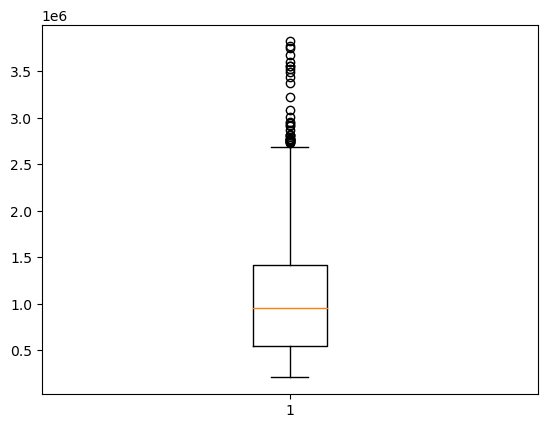

In [10]:
#Explore outliers with boxplot

plt.boxplot(df["Weekly_Sales"])
plt.show()

In [11]:
#Handle outliers using winsorize

from scipy.stats.mstats import winsorize
df["Weekly_Sales"] = winsorize(df["Weekly_Sales"], limits = (0.05,0.05))

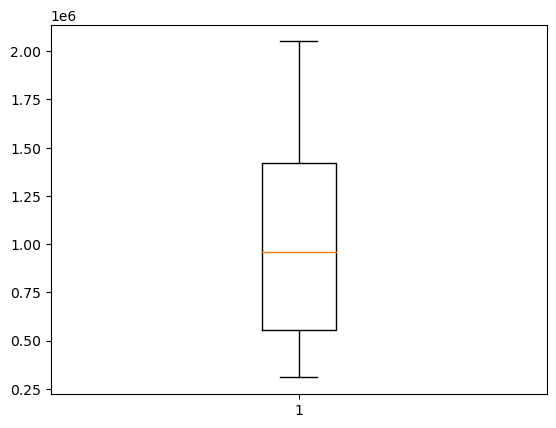

In [12]:
plt.boxplot(df["Weekly_Sales"])
plt.show()

In [13]:
# Extract date related features

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [14]:
# Create Binary features for Holiday weeks

df['IsHolidayWeek'] = df['Holiday_Flag'].apply(lambda x: 1 if x==1 else 0)

In [15]:
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Year  Month  DayOfWeek  IsHolidayWeek  
0     211.096358         8.106  2010      5          6              0  
1     211.242170         8.106  2010     12          3              1  
2     211.289143         8.106  2010      2          4              0  
3     211.319643         8.106  2010      2          4              0  
4     211.350143         8.106  2010      5          0              0  
...          ...           ...   ...    ...        ...            ...  
6430  192.013558         8.684  2012      9          4              0  
6431  192.170412         8.667  2012      5          3              0  
6432  192.327265         8.667  2012     12          0              0  
6433  192.330854         8.667  2012     10          4              0  
6434  192.308899         8.667  2012     10          4              0  

[6435 rows x 12 columns]

# Data Analysis and Visualisation

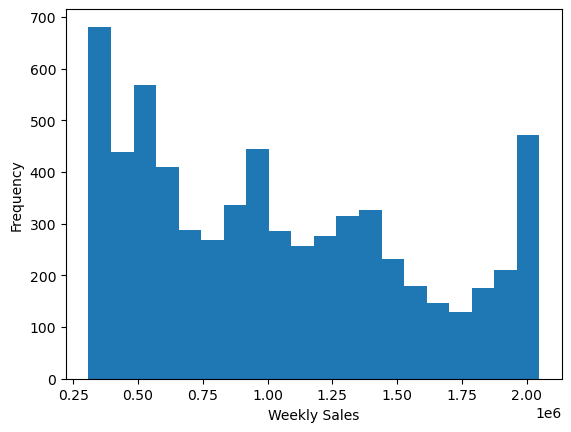

In [16]:
# Visualize the distribution of weekly sales

plt.hist(df['Weekly_Sales'], bins = 20)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

* In the above histogram graph, X-axis shows the bins of weekly sales and Y- axis shows the frequency.
* This Histogram shows the frequency of Weekly sales for each stores.
* The X-axis shows the weekly sales in millions & Y-axis shows the frequency of those sales.
* The shape of the data is Bimodal meaning there are 2 peaks in frequency, this might indicate there are 2 types of weeks for the store, such as   high & low seasons.
* The center of the data is around 0.75 million, meaning that the average weekly sales are about that amount.
* The spread of the data is from 0 to 2 million, meaning that there is a lot of variation in the weekly sales. You can also see that there is a gap between 0.5 and 1 million, meaning that there are no weeks with sales in that range. 
* This might indicate that there is a threshold for customer demand or competition.

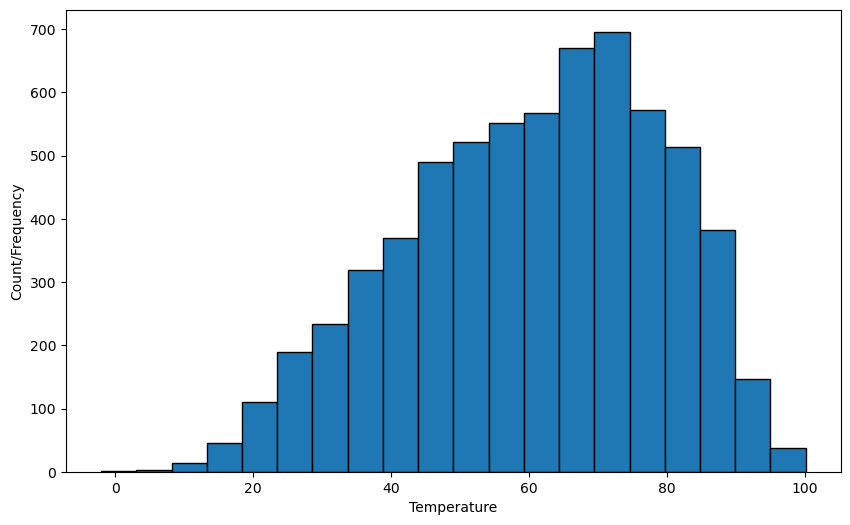

In [17]:
plt.figure(figsize = (10,6))
plt.hist(df['Temperature'], bins = 20, edgecolor = 'k')
plt.xlabel('Temperature')
plt.ylabel('Count/Frequency')
plt.show()

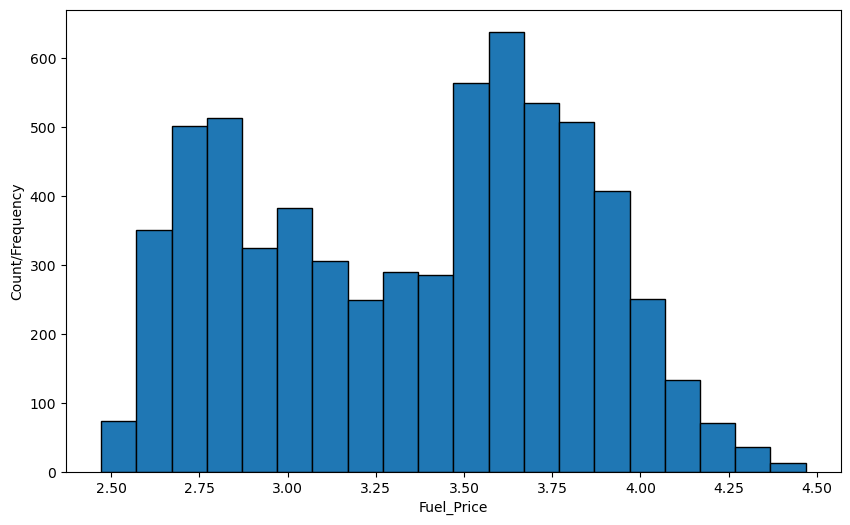

In [18]:
plt.figure(figsize = (10,6))
plt.hist(df['Fuel_Price'], bins = 20, edgecolor = "k")
plt.xlabel('Fuel_Price')
plt.ylabel('Count/Frequency')
plt.show()

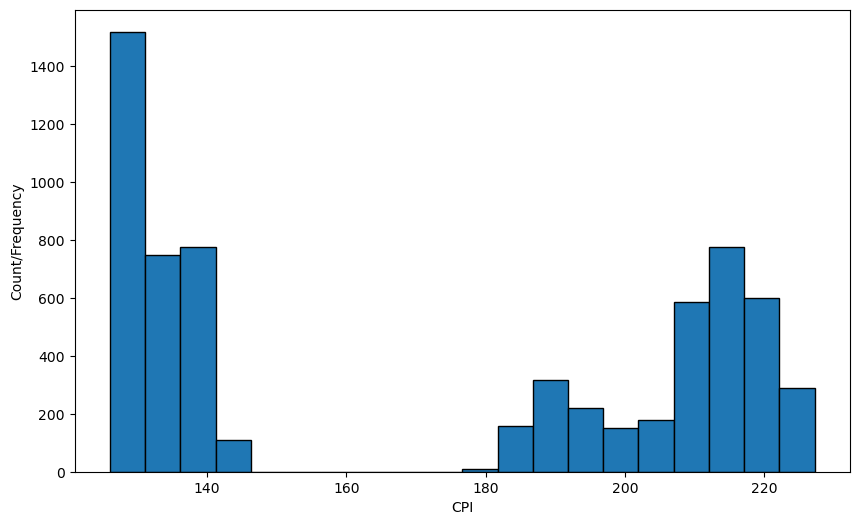

In [19]:
plt.figure(figsize = (10,6))
plt.hist(df['CPI'], bins = 20, edgecolor = 'k')
plt.xlabel('CPI')
plt.ylabel('Count/Frequency')
plt.show()

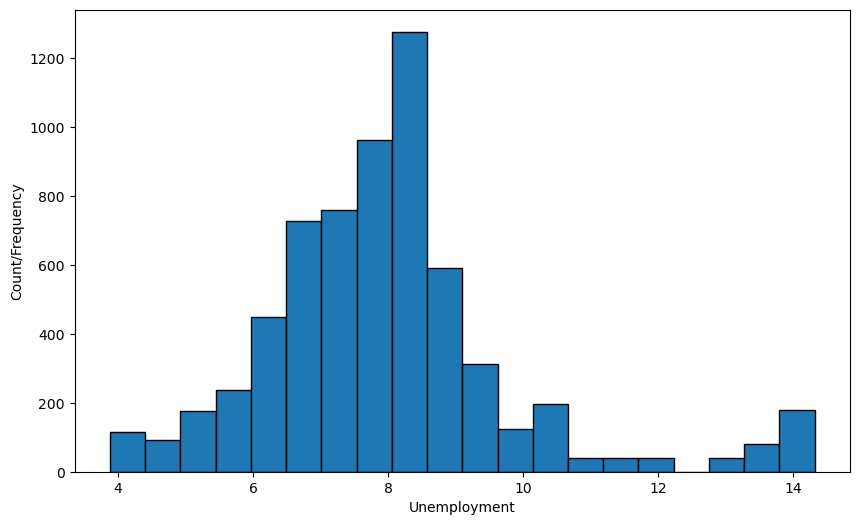

In [20]:
plt.figure(figsize = (10,6))
plt.hist(df['Unemployment'],bins = 20, edgecolor ='k')
plt.xlabel('Unemployment')
plt.ylabel('Count/Frequency')
plt.show()

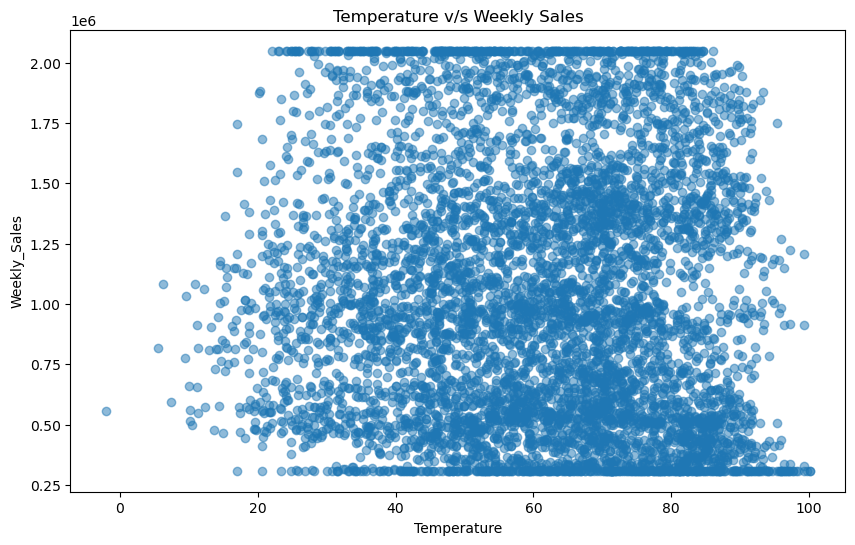

In [21]:
# Let's visualize the relationship between variables by using scatter plot.

plt.figure(figsize = (10,6))
plt.scatter(df['Temperature'], df['Weekly_Sales'], alpha = 0.5)
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.title('Temperature v/s Weekly Sales')
plt.show()

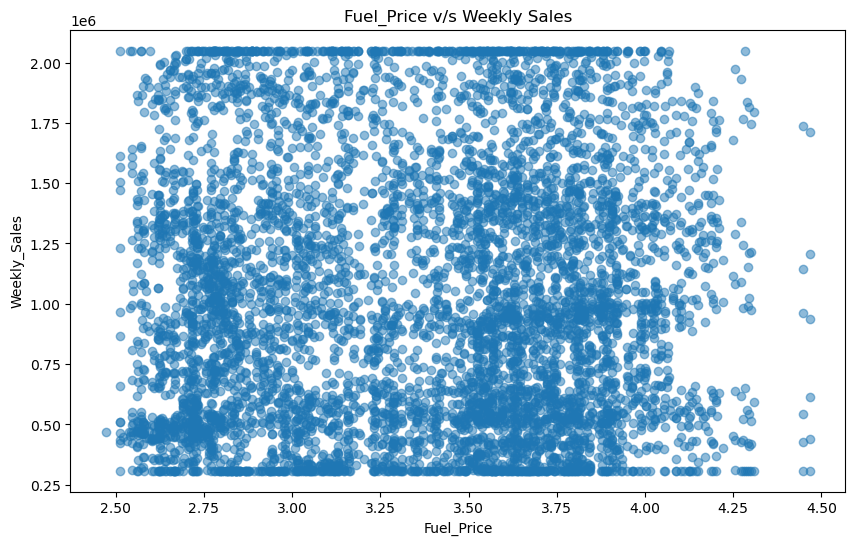

In [22]:
plt.figure(figsize = (10,6))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], alpha = 0.5)
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.title('Fuel_Price v/s Weekly Sales')
plt.show()

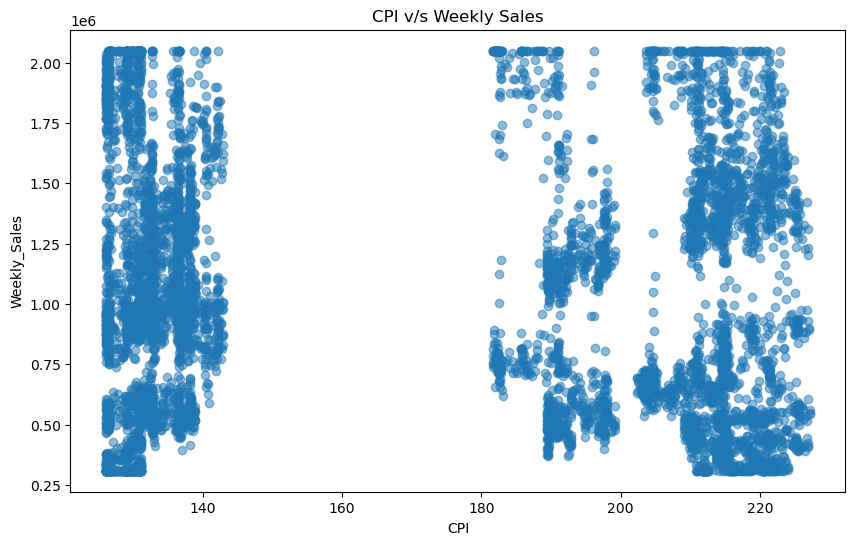

In [23]:
plt.figure(figsize = (10,6))
plt.scatter(df['CPI'], df['Weekly_Sales'], alpha = 0.5)
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.title('CPI v/s Weekly Sales')
plt.show()

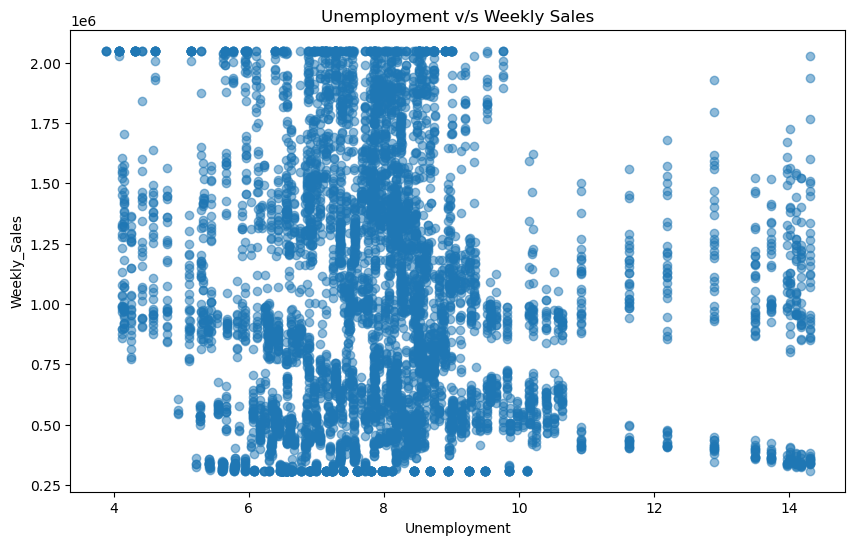

In [24]:
plt.figure(figsize = (10,6))
plt.scatter(df['Unemployment'], df['Weekly_Sales'], alpha = 0.5)
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
plt.title('Unemployment v/s Weekly Sales')
plt.show()

In [25]:
# Calculate correlations

correlation_matrix = df.corr()
print(correlation_matrix)

                      Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store          1.000000e+00     -0.335892 -4.386841e-16    -0.022659   
Weekly_Sales  -3.358917e-01      1.000000  2.957266e-02    -0.048874   
Holiday_Flag  -4.386841e-16      0.029573  1.000000e+00    -0.155091   
Temperature   -2.265908e-02     -0.048874 -1.550913e-01     1.000000   
Fuel_Price     6.002295e-02      0.016511 -7.834652e-02     0.144982   
CPI           -2.094919e-01     -0.076653 -2.162091e-03     0.176888   
Unemployment   2.235313e-01     -0.104343  1.096028e-02     0.101158   
Year           3.474318e-12     -0.011671 -5.678257e-02     0.064269   
Month          6.289676e-16      0.050115  3.322341e-01     0.066440   
DayOfWeek     -2.243183e-15     -0.020265 -9.100474e-02     0.018331   
IsHolidayWeek -4.386841e-16      0.029573  1.000000e+00    -0.155091   

               Fuel_Price       CPI  Unemployment          Year         Month  \
Store            0.060023 -0.209492      0.223531  3.4

C:\Users\shafi\AppData\Local\Temp\ipykernel_21604\2238985728.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


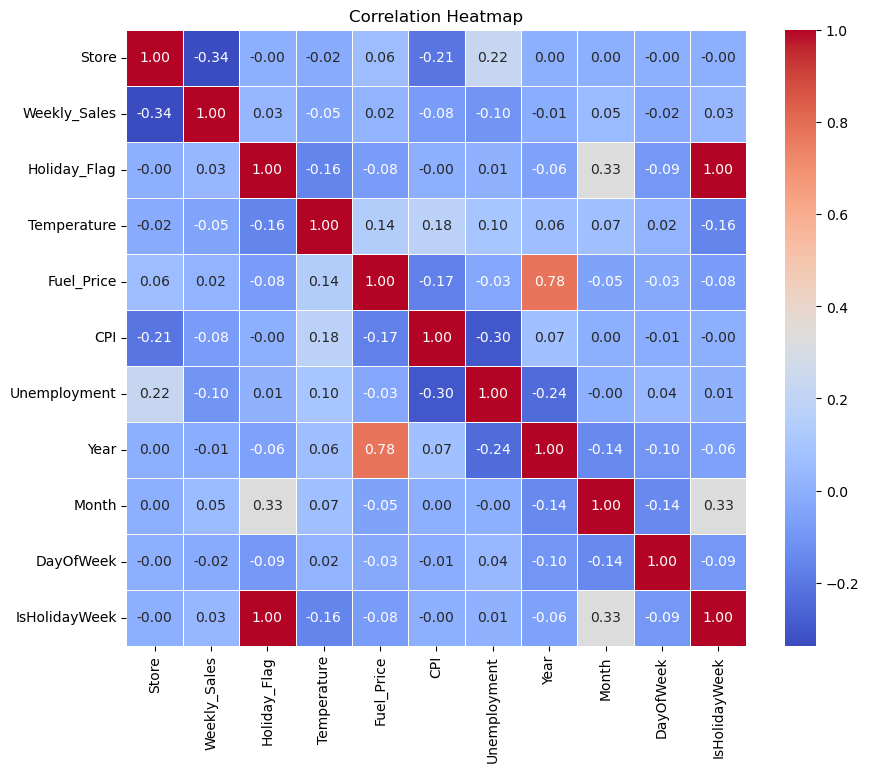

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Hypothesis testing

# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [27]:
store_correlations = df.groupby('Store')[['Weekly_Sales','Unemployment']].corr().iloc[0::2,-1].reset_index()

In [28]:
store_correlations

Store       level_1  Unemployment
0       1  Weekly_Sales     -0.127699
1       2  Weekly_Sales      0.016238
2       3  Weekly_Sales     -0.230413
3       4  Weekly_Sales     -0.635985
4       5  Weekly_Sales     -0.102327
5       6  Weekly_Sales      0.030571
6       7  Weekly_Sales     -0.165382
7       8  Weekly_Sales     -0.052580
8       9  Weekly_Sales     -0.191534
9      10  Weekly_Sales      0.239048
10     11  Weekly_Sales     -0.033093
11     12  Weekly_Sales     -0.009286
12     13  Weekly_Sales     -0.419841
13     14  Weekly_Sales      0.166267
14     15  Weekly_Sales      0.078905
15     16  Weekly_Sales     -0.070864
16     17  Weekly_Sales     -0.263600
17     18  Weekly_Sales      0.139179
18     19  Weekly_Sales      0.129393
19     20  Weekly_Sales     -0.099850
20     21  Weekly_Sales      0.218367
21     22  Weekly_Sales      0.039043
22     23  Weekly_Sales     -0.105928
23     24  Weekly_Sales     -0.004409
24     25  Weekly_Sales     -0.004958
25     26  Weekly_Sales     -0.066899
26     27  Weekly_Sales      0.001003
27     28  Weekly_Sales      0.136671
28     29  Weekly_Sales      0.084682
29     30  Weekly_Sales      0.201862
30     31  Weekly_Sales     -0.066072
31     32  Weekly_Sales     -0.099455
32     33  Weekly_Sales      0.207187
33     34  Weekly_Sales      0.017010
34     35  Weekly_Sales      0.483865
35     36  Weekly_Sales      0.807890
36     37  Weekly_Sales     -0.221287
37     38  Weekly_Sales     -0.785639
38     39  Weekly_Sales     -0.479075
39     40  Weekly_Sales     -0.112528
40     41  Weekly_Sales     -0.382310
41     42  Weekly_Sales     -0.356355
42     43  Weekly_Sales     -0.201954
43     44  Weekly_Sales     -0.619179
44     45  Weekly_Sales     -0.004041

In [29]:
#Most affected stores with negative correlations

most_affected_store = store_correlations.loc[store_correlations['Unemployment']<0,'Store']


In [30]:
print("Stores most affected by unemployment rate on weekly sales: ")
print(most_affected_store)

Stores most affected by unemployment rate on weekly sales: 
0      1
2      3
3      4
4      5
6      7
7      8
8      9
10    11
11    12
12    13
15    16
16    17
19    20
22    23
23    24
24    25
25    26
30    31
31    32
36    37
37    38
38    39
39    40
40    41
41    42
42    43
43    44
44    45
Name: Store, dtype: int64


In [31]:
most_affected_store.count()

28

In [32]:
# To visualise the effect of unemployment rate on weekly sales & identify which stores are most affected.

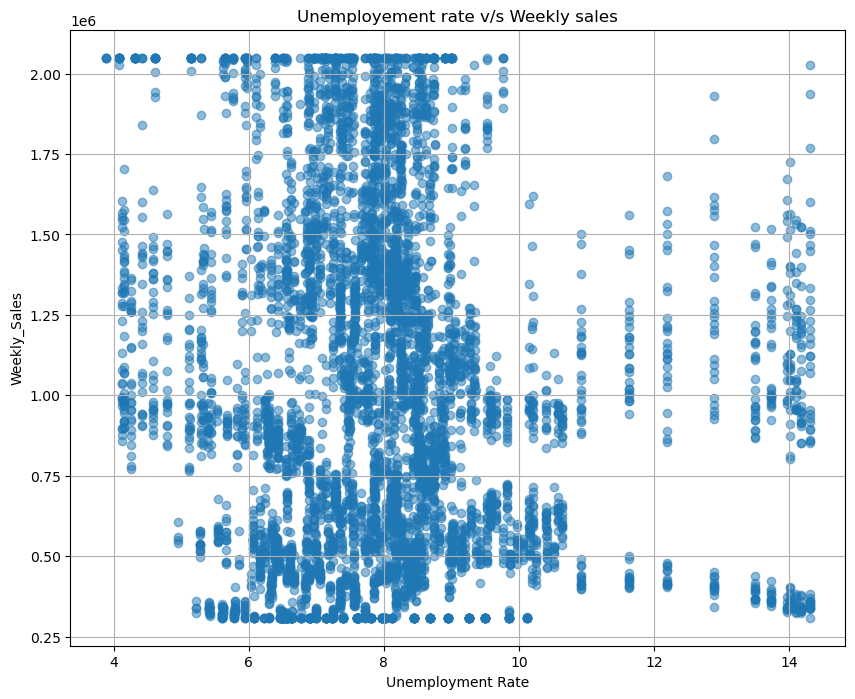

In [33]:
#Scatter plot

plt.figure(figsize = (10,8))
plt.scatter(df['Unemployment'],df['Weekly_Sales'], alpha = 0.5)
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly_Sales')
plt.title("Unemployement rate v/s Weekly sales")
plt.grid(True)
plt.show()

In [34]:
# Box plot

most_affected_data = df[df['Store'].isin(most_affected_store)]

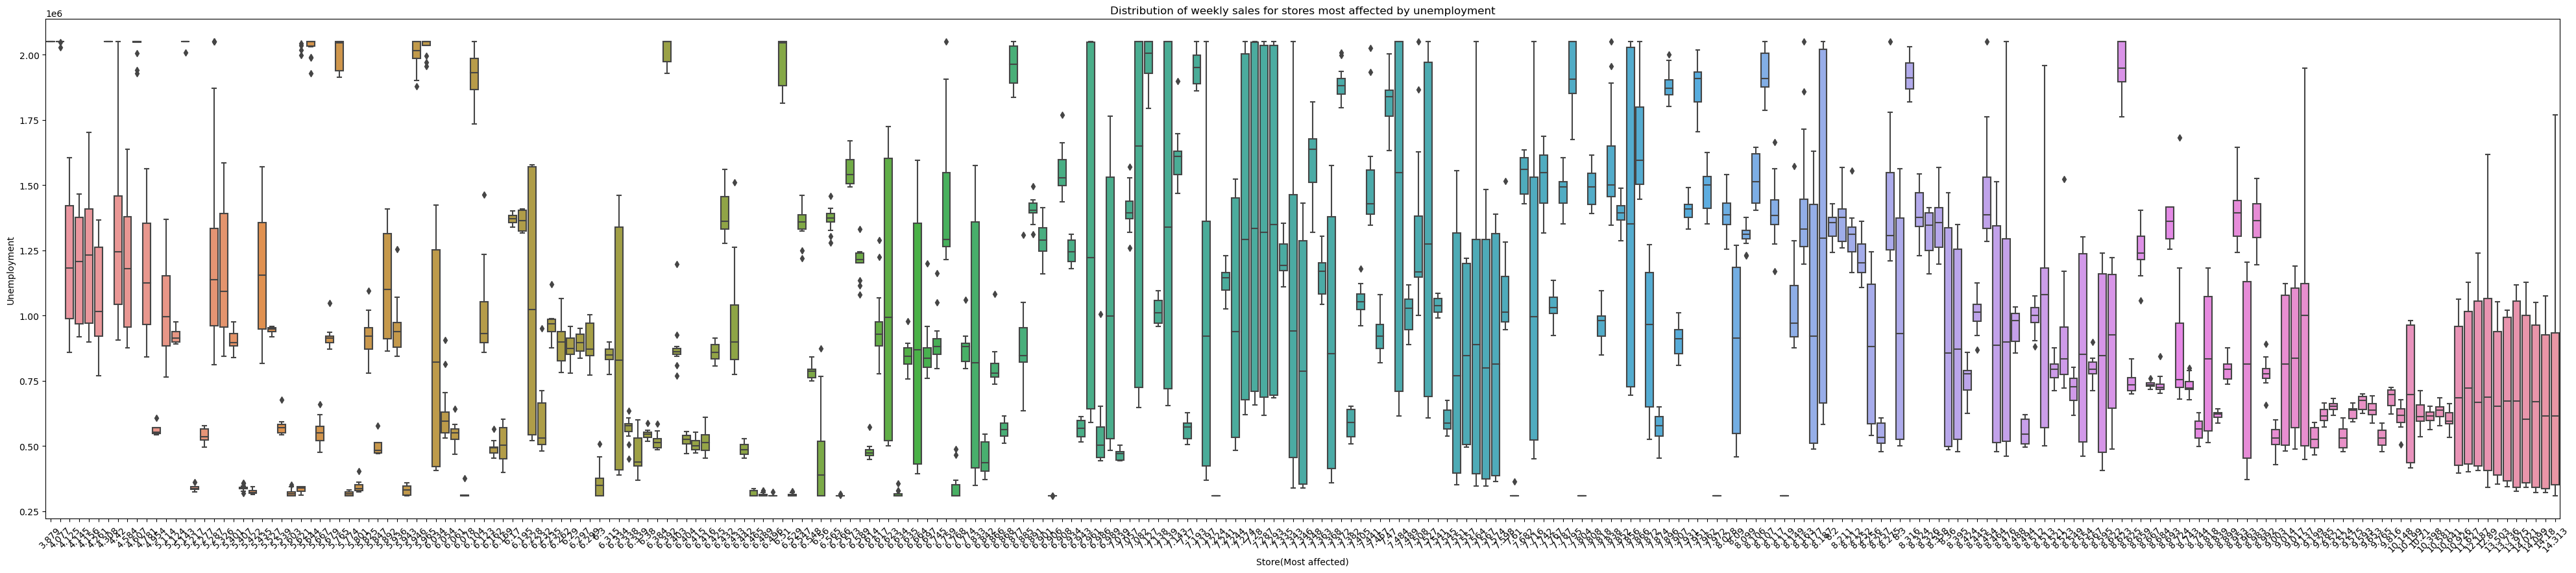

In [65]:
plt.figure(figsize = (50,10))
sns.boxplot(x='Unemployment', y = 'Weekly_Sales', data = most_affected_data)
plt.xlabel('Store(Most affected)')
plt.ylabel('Unemployment')
plt.title("Distribution of weekly sales for stores most affected by unemployment")
plt.xticks(rotation = 45)
plt.show()

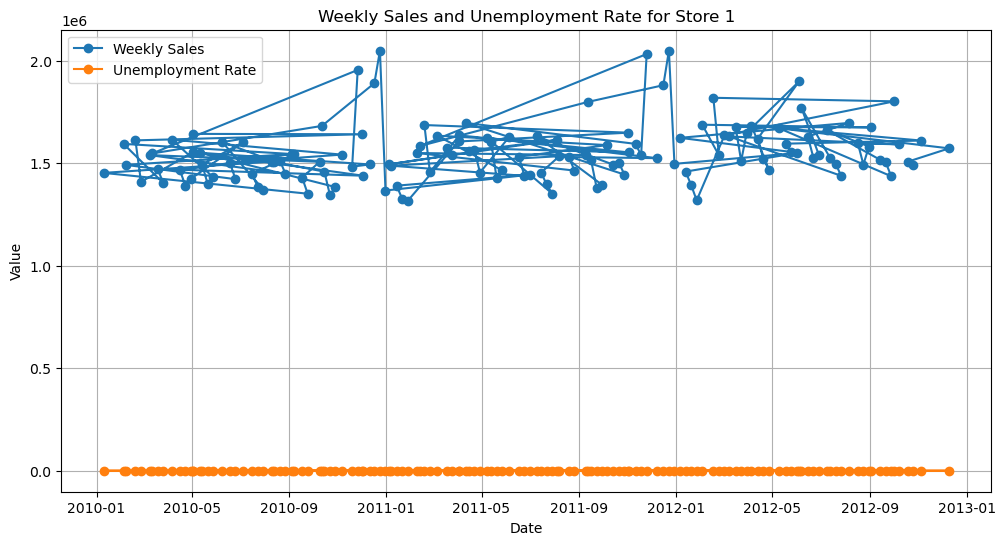

In [36]:
# Select a specific store (e.g., Store 1)
store_id = 1
store_data = df[df['Store'] == store_id]

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(store_data['Date'], store_data['Weekly_Sales'], label='Weekly Sales', marker='o')
plt.plot(store_data['Date'], store_data['Unemployment'], label='Unemployment Rate', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Weekly Sales and Unemployment Rate for Store {store_id}')
plt.legend()
plt.grid(True)
plt.show()


# b. If the weekly sales show a seasonal trend, when and what could be the reason?

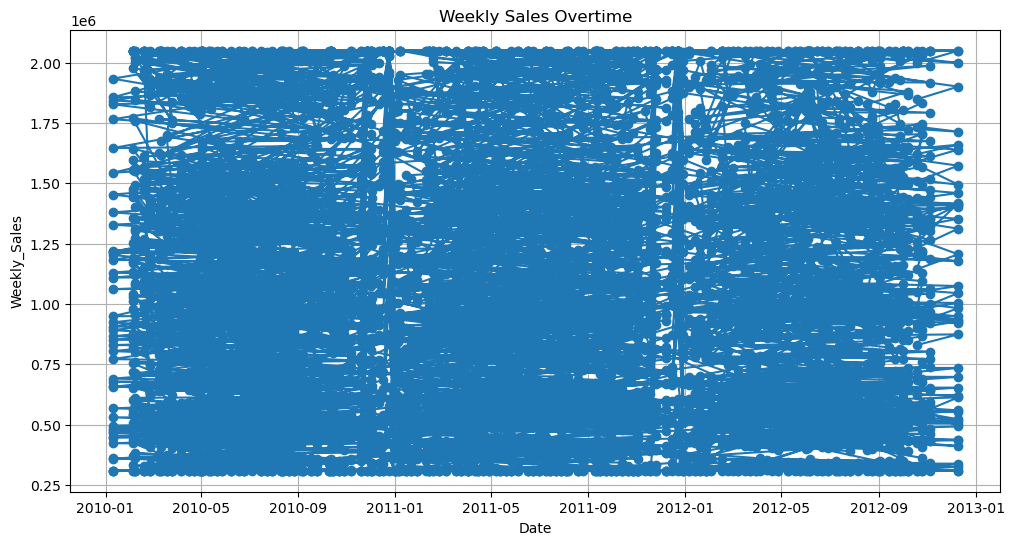

In [37]:
# Visualize weekly sales overtime

plt.figure(figsize = (12,6))
plt.plot(df['Date'], df['Weekly_Sales'], marker = 'o', linestyle = '-')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title("Weekly Sales Overtime")
plt.grid(True)
plt.show()

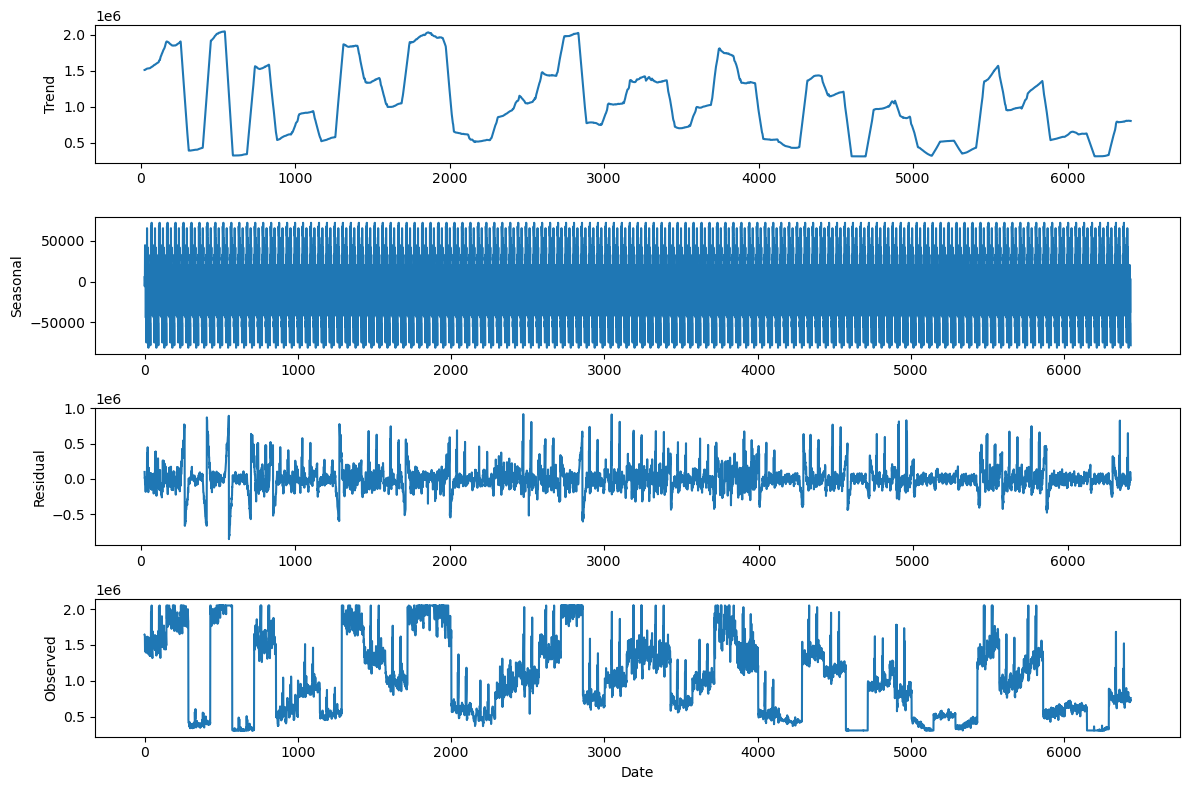

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Weekly_Sales'], model='additive', period=52)  # Assuming a weekly seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.trend) 
plt.ylabel('Trend')
plt.subplot(412)
plt.plot(result.seasonal)
plt.ylabel('Seasonal')
plt.subplot(413)
plt.plot(result.resid)
plt.ylabel('Residual')
plt.subplot(414)
plt.plot(result.observed)
plt.ylabel('Observed')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


<Figure size 1200x400 with 0 Axes>

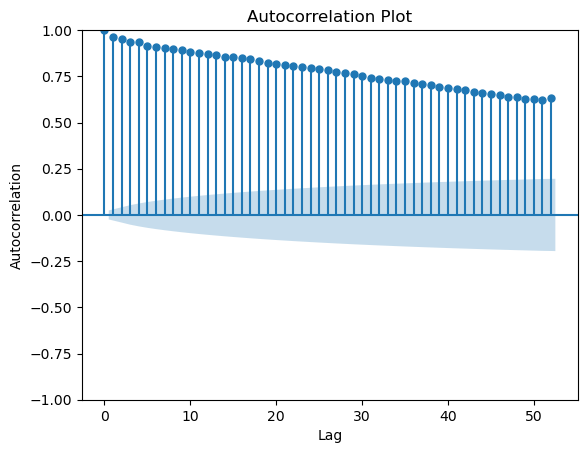

C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x400 with 0 Axes>

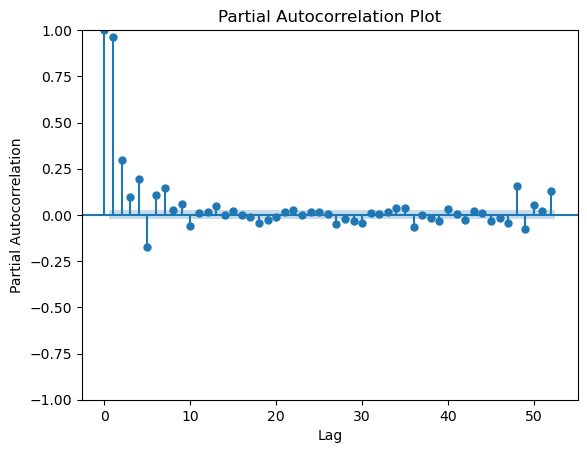

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot 
plt.figure(figsize=(12, 4))
plot_acf(df['Weekly_Sales'], lags=52)  # Assuming weekly seasonality
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Partial autocorrelation plot
plt.figure(figsize=(12, 4))
plot_pacf(df['Weekly_Sales'], lags=52)  # Assuming weekly seasonality
plt.title('Partial Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


# c. Does temperature affect the weekly sales in any manner?

In [40]:
# Calculate the correlation efficient
Correlation_temp = df['Temperature'].corr(df['Weekly_Sales'])
print(f"Correlation between Temperature & Weekly sales is : {Correlation_temp:.2f}")

Correlation between Temperature & Weekly sales is : -0.05


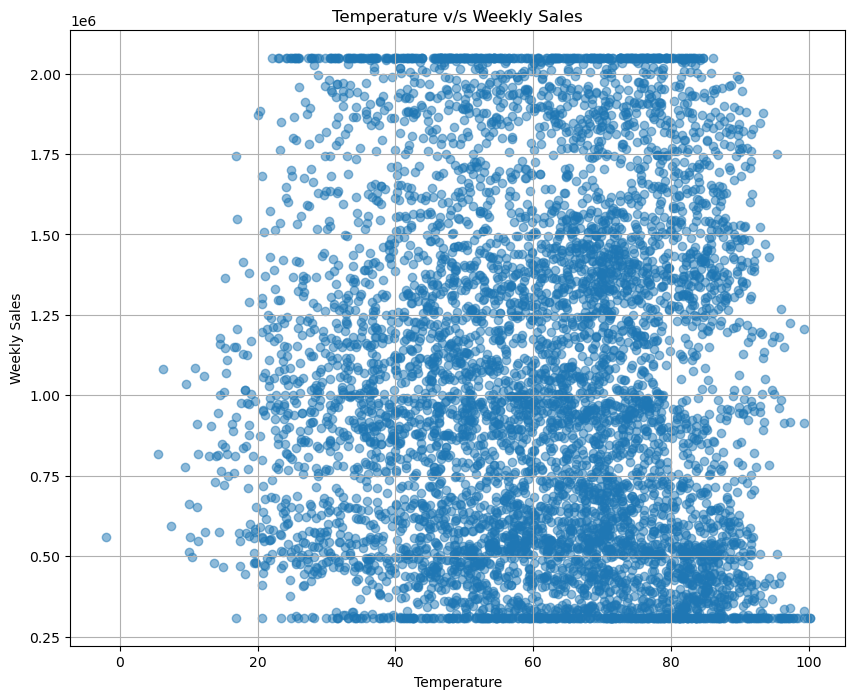

In [41]:
# Scatter plot visualization;

plt.figure(figsize = (10,8))
plt.scatter(df['Temperature'], df['Weekly_Sales'], alpha = 0.5)
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title("Temperature v/s Weekly Sales")
plt.grid(True)
plt.show()

## d. How is the Consumer Price index affecting the weekly sales of various stores?

In [42]:
# Calculate the correlation between CPI and weekly sales for each store

store_correlations = df.groupby('Store')[['Weekly_Sales','CPI']].corr().iloc[0::2,-1].reset_index()
print(store_correlations)

    Store       level_1       CPI
0       1  Weekly_Sales  0.262734
1       2  Weekly_Sales -0.042000
2       3  Weekly_Sales  0.317250
3       4  Weekly_Sales  0.679106
4       5  Weekly_Sales  0.203844
5       6  Weekly_Sales  0.002392
6       7  Weekly_Sales  0.289044
7       8  Weekly_Sales  0.120255
8       9  Weekly_Sales  0.294805
9      10  Weekly_Sales -0.177065
10     11  Weekly_Sales  0.083506
11     12  Weekly_Sales  0.084087
12     13  Weekly_Sales  0.424136
13     14  Weekly_Sales -0.535995
14     15  Weekly_Sales -0.174467
15     16  Weekly_Sales  0.124285
16     17  Weekly_Sales  0.348571
17     18  Weekly_Sales -0.193541
18     19  Weekly_Sales -0.177898
19     20  Weekly_Sales  0.246333
20     21  Weekly_Sales -0.163649
21     22  Weekly_Sales -0.038602
22     23  Weekly_Sales  0.118849
23     24  Weekly_Sales -0.003218
24     25  Weekly_Sales -0.010914
25     26  Weekly_Sales  0.131980
26     27  Weekly_Sales -0.250702
27     28  Weekly_Sales -0.095908
28     29  Wee

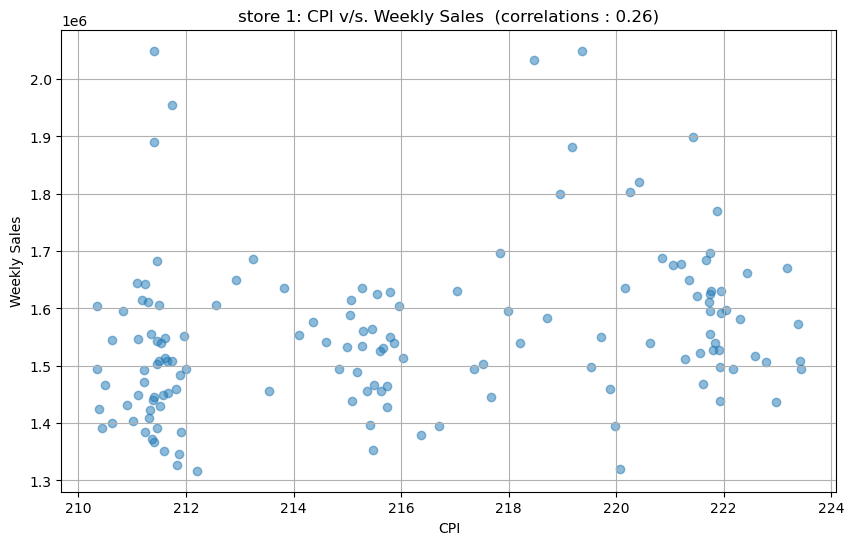

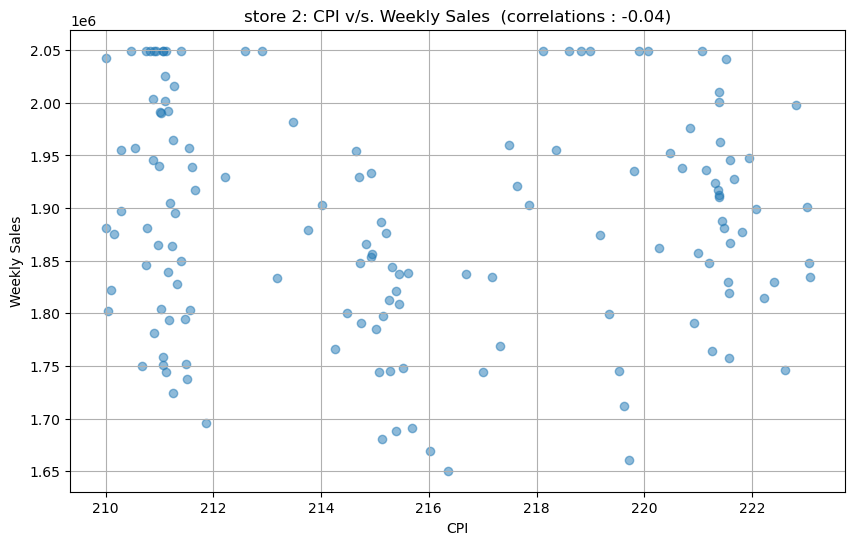

In [43]:
selected_stores = [1,2]
for store_id in selected_stores:
    store_data = df[df['Store'] == store_id]
    correlations = store_correlations.loc[store_correlations['Store'] == store_id, 'CPI'] 
    
    plt.figure(figsize = (10,6))
    plt.scatter(store_data['CPI'], store_data['Weekly_Sales'], alpha = 0.5)
    plt.xlabel('CPI')
    plt.ylabel('Weekly Sales')
    plt.title(f'store {store_id}: CPI v/s. Weekly Sales  (correlations : {correlations.values[0]:.2f})')
    plt.grid(True)
    plt.show()

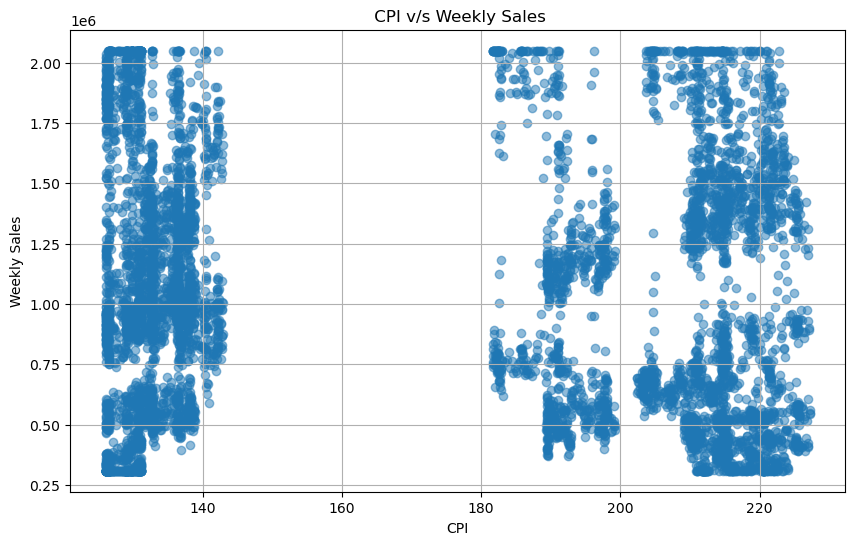

In [44]:
# Create an over all scatter plot for all stores

plt.figure(figsize = (10,6))
plt.scatter(df['CPI'], df['Weekly_Sales'], alpha =0.5)
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title(' CPI v/s Weekly Sales')
plt.grid(True)
plt.show()

# e. Top performing stores according to the historical data

In [45]:
# Calculate the mean weekly sales of stores
store_sales_mean = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

In [46]:
store_sales_mean

Store  Weekly_Sales
0       1  1.551354e+06
1       2  1.883795e+06
2       3  4.027044e+05
3       4  1.991632e+06
4       5  3.254993e+05
5       6  1.552614e+06
6       7  5.706173e+05
7       8  9.087495e+05
8       9  5.439806e+05
9      10  1.842534e+06
10     11  1.353440e+06
11     12  1.009002e+06
12     13  1.945040e+06
13     14  1.928505e+06
14     15  6.233125e+05
15     16  5.192477e+05
16     17  8.935814e+05
17     18  1.084718e+06
18     19  1.437591e+06
19     20  1.998897e+06
20     21  7.560691e+05
21     22  1.028501e+06
22     23  1.378905e+06
23     24  1.353571e+06
24     25  7.067215e+05
25     26  1.002912e+06
26     27  1.751345e+06
27     28  1.323522e+06
28     29  5.394514e+05
29     30  4.385796e+05
30     31  1.395765e+06
31     32  1.166568e+06
32     33  3.088693e+05
33     34  9.667816e+05
34     35  9.197250e+05
35     36  3.759794e+05
36     37  5.189003e+05
37     38  3.857630e+05
38     39  1.441296e+06
39     40  9.641280e+05
40     41  1.265400e+06
41     42  5.564039e+05
42     43  6.333247e+05
43     44  3.161250e+05
44     45  7.859814e+05

In [47]:
# Sort stores by descending order to find top performing stores
top_performing_stores = store_sales_mean.sort_values(by='Weekly_Sales', ascending = False)
print("Top performing stores:")
print(top_performing_stores)

Top performing stores:
    Store  Weekly_Sales
19     20  1.998897e+06
3       4  1.991632e+06
12     13  1.945040e+06
13     14  1.928505e+06
1       2  1.883795e+06
9      10  1.842534e+06
26     27  1.751345e+06
5       6  1.552614e+06
0       1  1.551354e+06
38     39  1.441296e+06
18     19  1.437591e+06
30     31  1.395765e+06
22     23  1.378905e+06
23     24  1.353571e+06
10     11  1.353440e+06
27     28  1.323522e+06
40     41  1.265400e+06
31     32  1.166568e+06
17     18  1.084718e+06
21     22  1.028501e+06
11     12  1.009002e+06
25     26  1.002912e+06
33     34  9.667816e+05
39     40  9.641280e+05
34     35  9.197250e+05
7       8  9.087495e+05
16     17  8.935814e+05
44     45  7.859814e+05
20     21  7.560691e+05
24     25  7.067215e+05
42     43  6.333247e+05
14     15  6.233125e+05
6       7  5.706173e+05
41     42  5.564039e+05
8       9  5.439806e+05
28     29  5.394514e+05
15     16  5.192477e+05
36     37  5.189003e+05
29     30  4.385796e+05
2       3  4.0270

In [48]:
top_performing_stores.head(5)

Store  Weekly_Sales
19     20  1.998897e+06
3       4  1.991632e+06
12     13  1.945040e+06
13     14  1.928505e+06
1       2  1.883795e+06

In [49]:
# Calculate the total sales of top performing stores

num_of_top_stores =5
top_store_Ids = top_performing_stores.head(num_of_top_stores)['Store']
top_storesdata = df[df['Store'].isin(top_store_Ids)]
total_sales_of_topstores = top_storesdata.groupby('Store')['Weekly_Sales'].sum().reset_index()
print("Total sales of top performing stores :")
print(total_sales_of_topstores)

Total sales of top performing stores :
   Store  Weekly_Sales
0      2  2.693827e+08
1      4  2.848033e+08
2     13  2.781408e+08
3     14  2.757763e+08
4     20  2.858422e+08


# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [50]:
worst_performing_stores = store_sales_mean.loc[store_sales_mean['Weekly_Sales'].idxmin()]

In [51]:
top_stores = store_sales_mean.loc[store_sales_mean['Weekly_Sales'].idxmax()]

In [52]:
print(worst_performing_stores)
print(top_stores)

Store               33.000000
Weekly_Sales    308869.304126
Name: 32, dtype: float64
Store           2.000000e+01
Weekly_Sales    1.998897e+06
Name: 19, dtype: float64


In [54]:
#Calculate the significant difference
difference =  top_stores['Weekly_Sales'] - worst_performing_stores['Weekly_Sales'] 

In [55]:
print(f"${difference:02f}")

$1690027.351678


# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [56]:
#Split the data set to train and test data:

train_data = df[:-12]
test_data = df[-12:]

In [57]:
# Using ARIMA model for forecasting of next 12 weeks sales for each stores:

import statsmodels.api as sm

In [58]:
forecast_results = {}

for store in df['Store'].unique():
    train_store_data = train_data[train_data['Store'] == store]
    test_store_data = test_data[test_data['Store'] == store]
    
    model = sm.tsa.ARIMA(train_store_data['Weekly_Sales'], order = (1,1,1))
    results = model.fit()
    
    forecast = results.forecast(steps = 12)
    forecast_results[store] = forecast

C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No support

C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supp

C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supp

C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supp

C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shafi\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-

In [59]:
forecast

131    760131.411621
132    774988.067674
133    781403.998733
134    784174.754898
135    785371.321640
136    785888.065765
137    786111.224642
138    786207.597066
139    786249.216044
140    786267.189435
141    786274.951346
142    786278.303371
Name: predicted_mean, dtype: float64

In [60]:
# Evaluate the forecast

from sklearn.metrics import mean_absolute_error, mean_squared_error


In [61]:
MAE_dict = {}
MSE_dict = {}

for store, forecast in forecast_results.items():
    test_store_data
    MAE = mean_absolute_error(test_store_data['Weekly_Sales'], forecast)
    MSE = mean_squared_error(test_store_data['Weekly_Sales'], forecast)
    
    MAE_dict[store] = MAE
    MSE_dict[store] = MSE
    
RMSE_dict = {store: np.sqrt(MSE) for store, MSE in MSE_dict.items()}   

In [62]:
print(MAE)
print(MSE)
print(RMSE_dict)

52495.35435283254
3118143532.563104
{1: 827823.2069823241, 2: 1114731.0317142147, 3: 316629.0501107297, 4: 1320146.9348629827, 5: 409290.421031941, 6: 779532.3760629594, 7: 228746.08935348465, 8: 183741.21983554927, 9: 175921.3882552263, 10: 1015208.410032104, 11: 604245.6000895422, 12: 273607.9903426049, 13: 1308035.9605226878, 14: 956478.7133632168, 15: 121519.24331869083, 16: 216124.43773380897, 17: 229176.81694946767, 18: 345490.26469253335, 19: 669256.9524554666, 20: 1301073.60962692, 21: 22095.924818911655, 22: 292847.5212291994, 23: 621804.6174325306, 24: 602914.7301615966, 25: 44574.94139418477, 26: 286108.61064277194, 27: 938538.9941433946, 28: 580698.5489117184, 29: 197675.84970455122, 30: 291472.76430130267, 31: 646123.791504239, 32: 463141.57464386284, 33: 421930.5301924627, 34: 234147.15372591763, 35: 127736.3338586034, 36: 421918.05285677395, 37: 193768.33843364724, 38: 302446.3227936055, 39: 838552.5761772, 40: 242029.84134197078, 41: 623646.9844969389, 42: 170605.324591

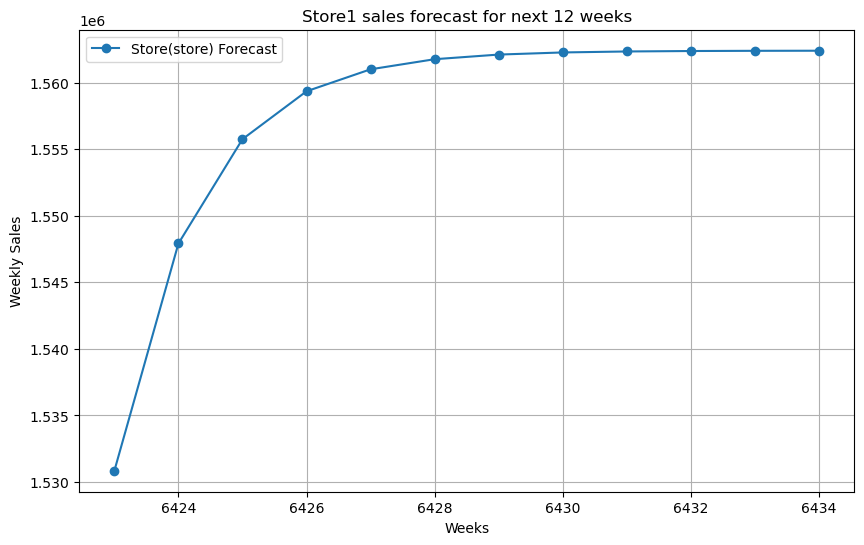

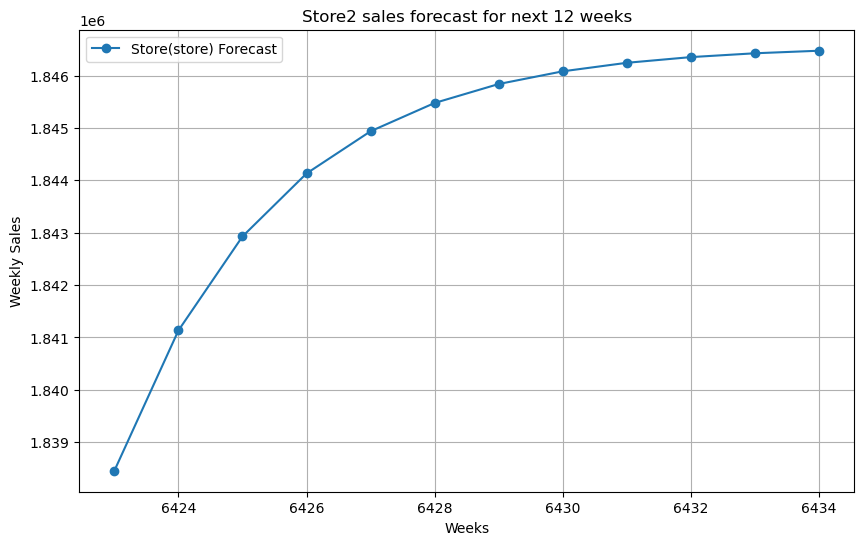

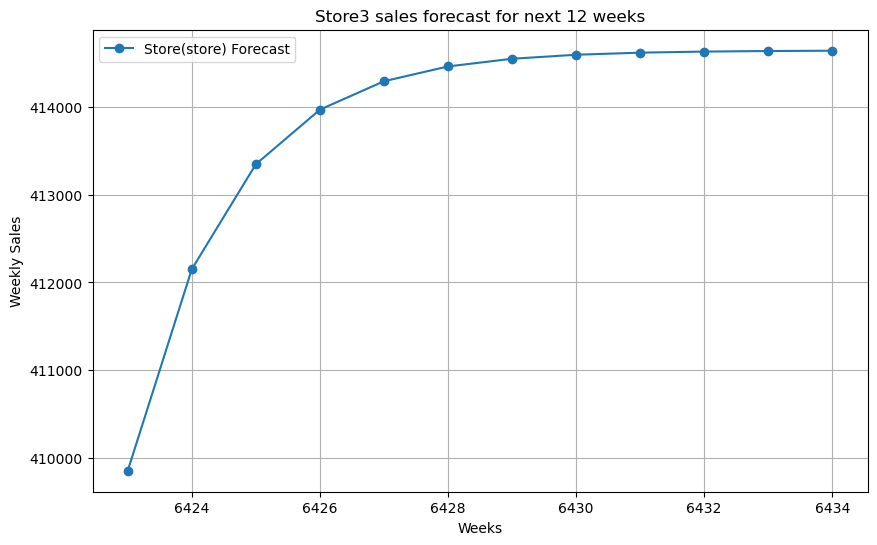

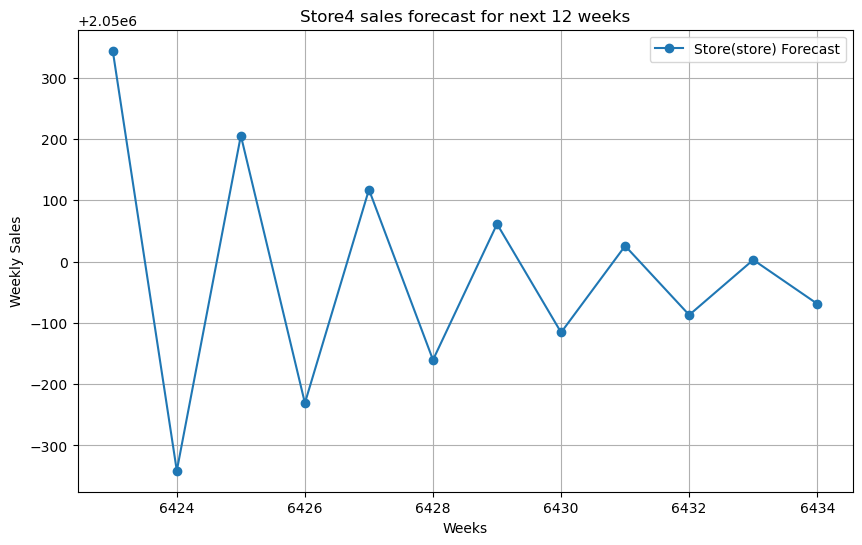

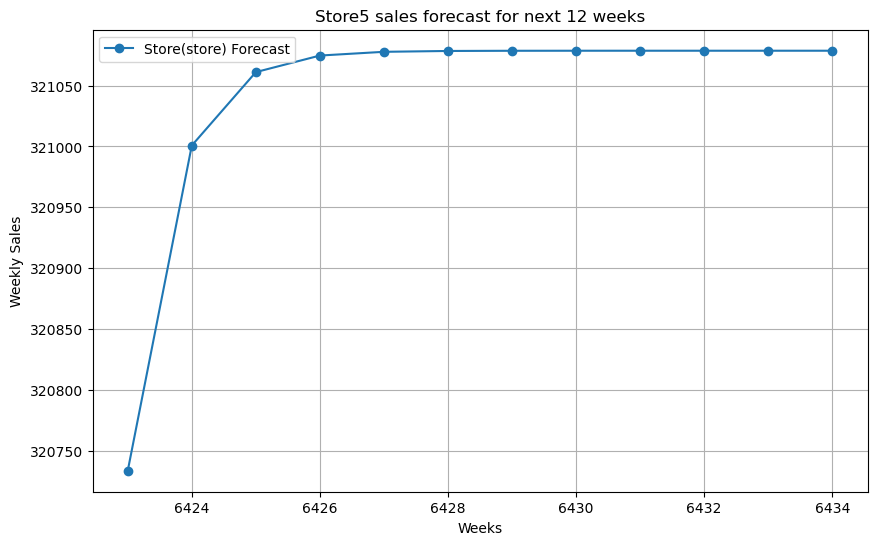

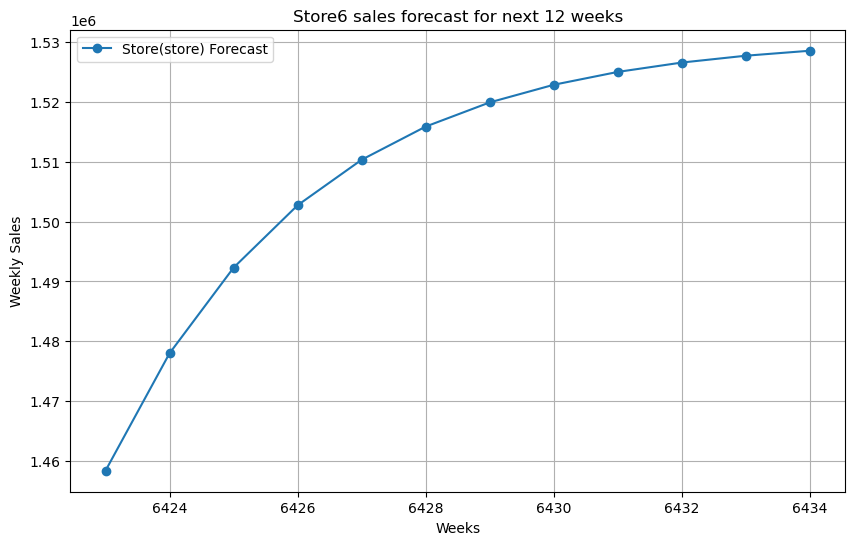

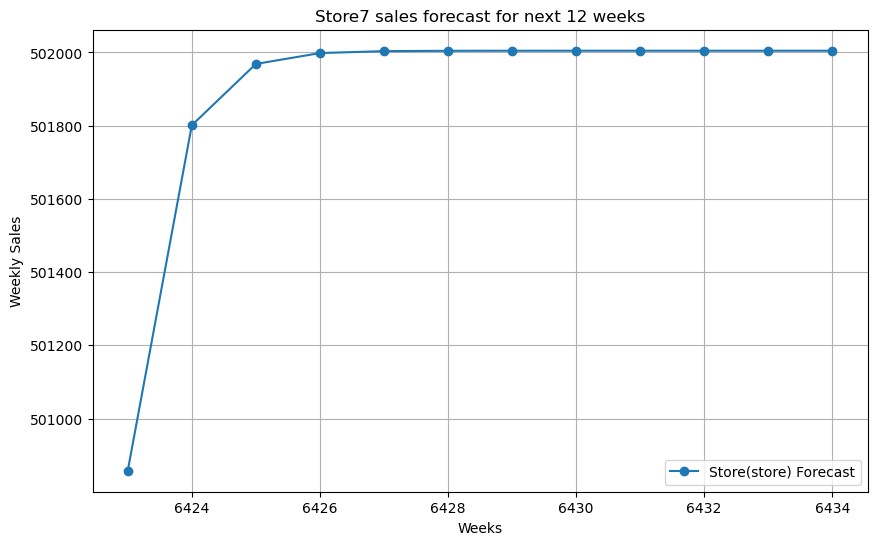

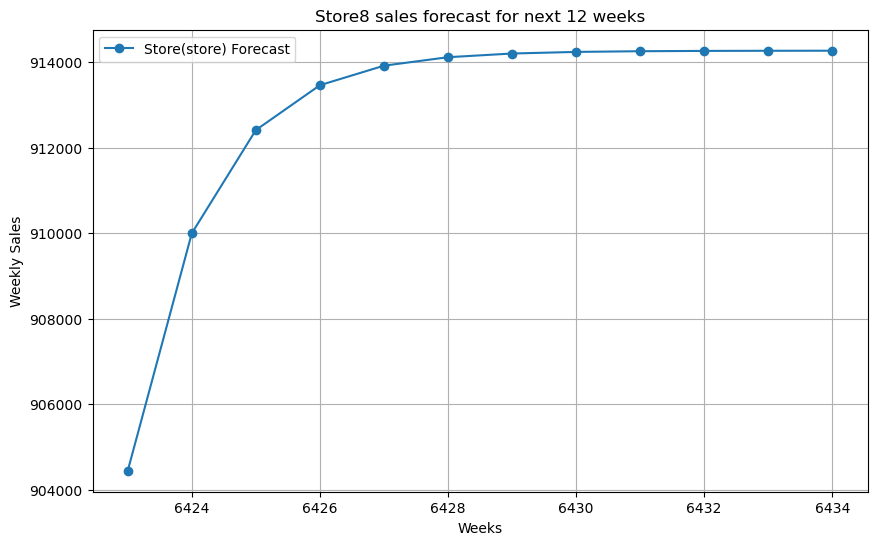

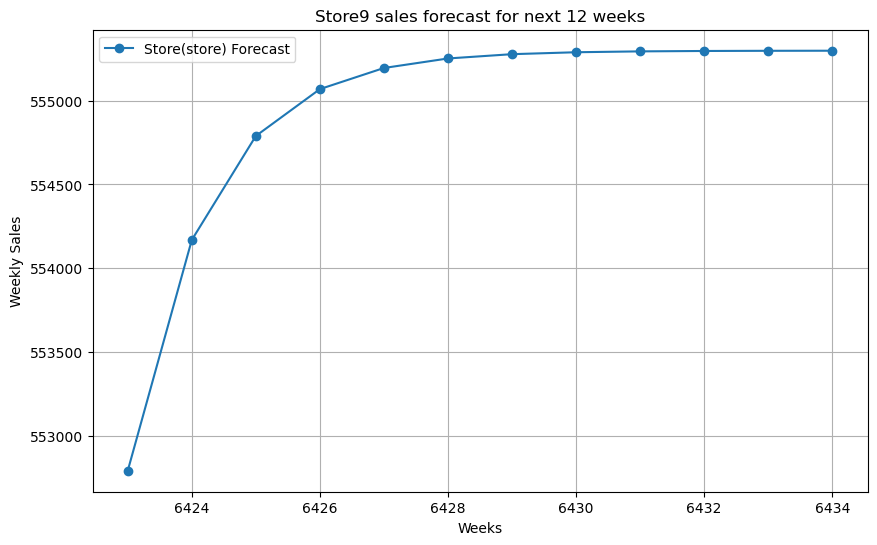

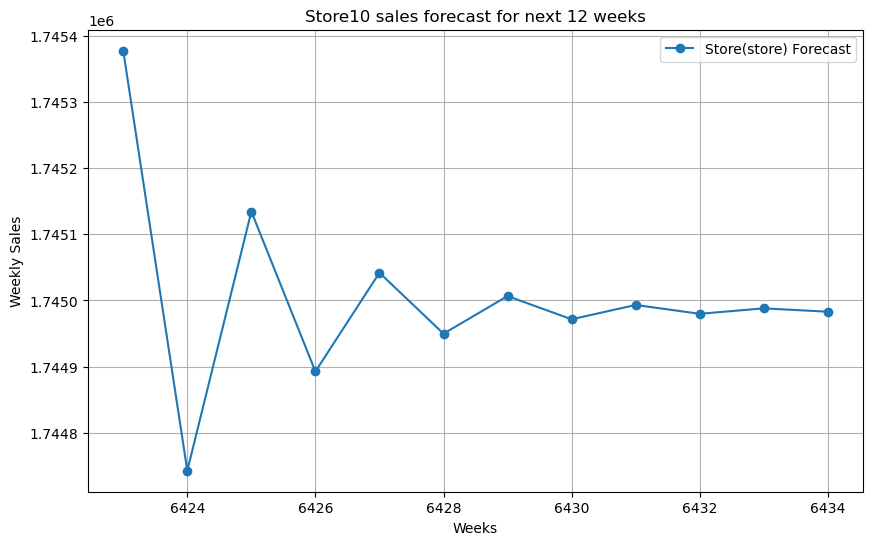

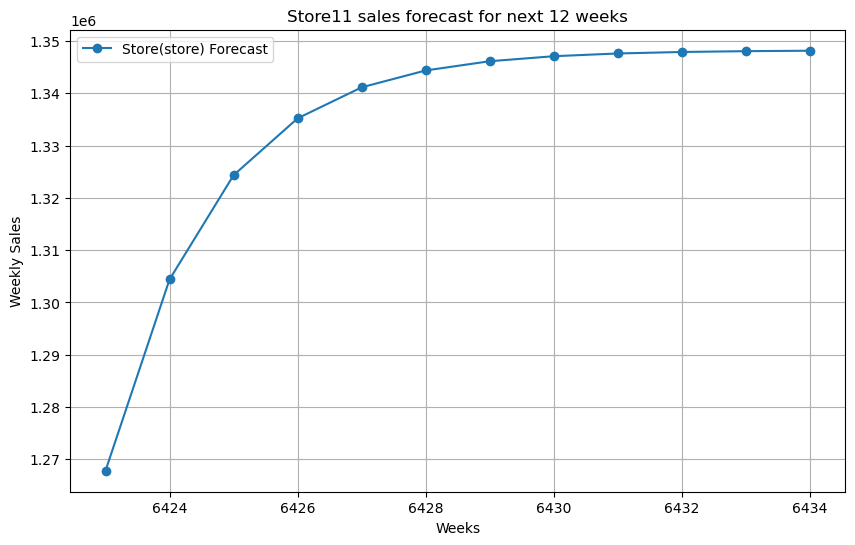

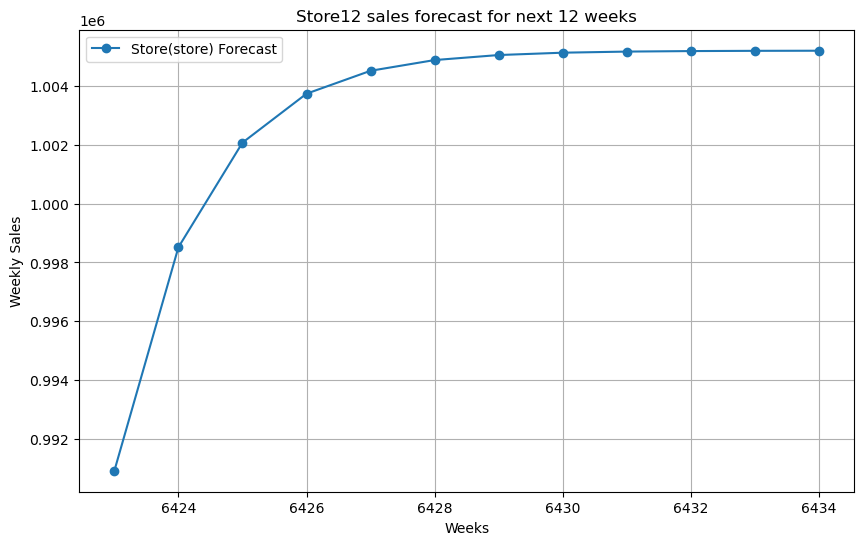

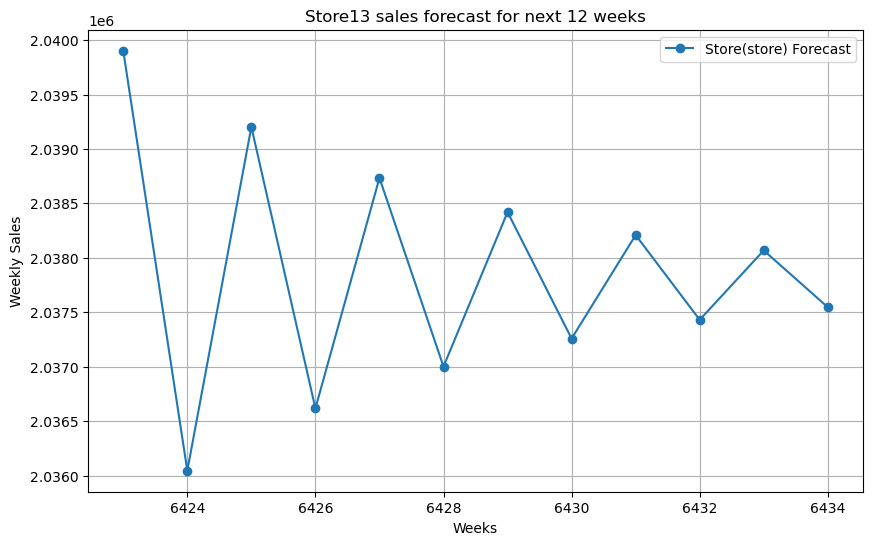

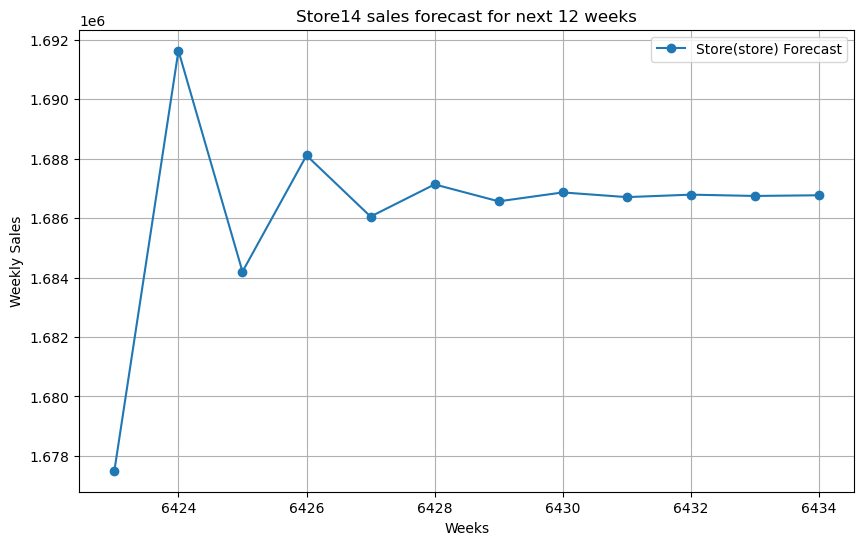

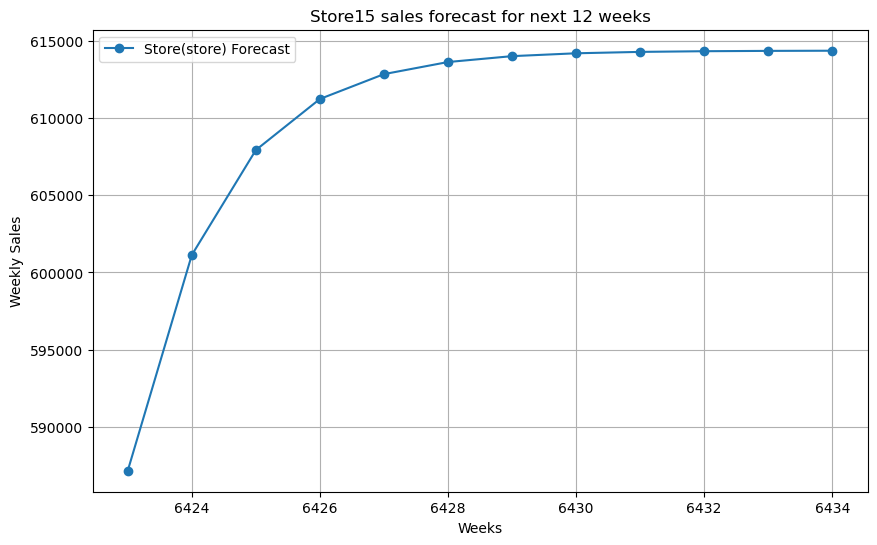

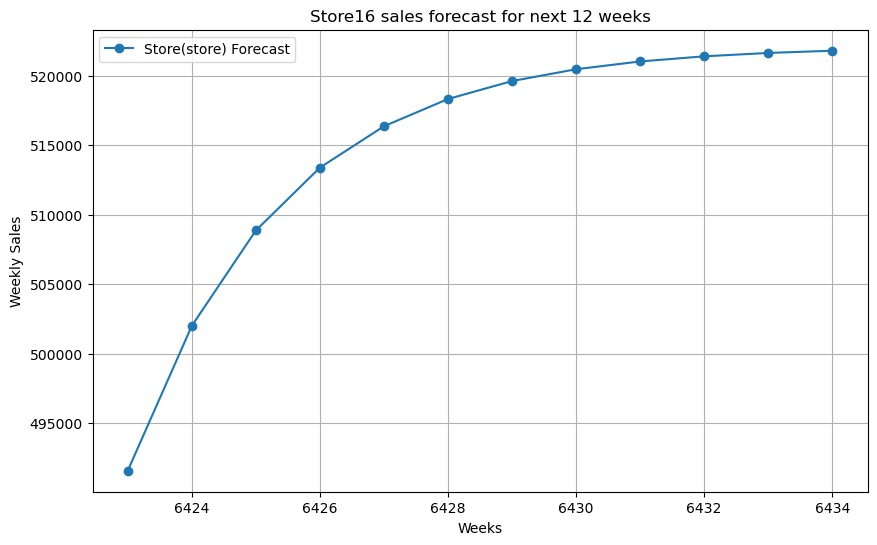

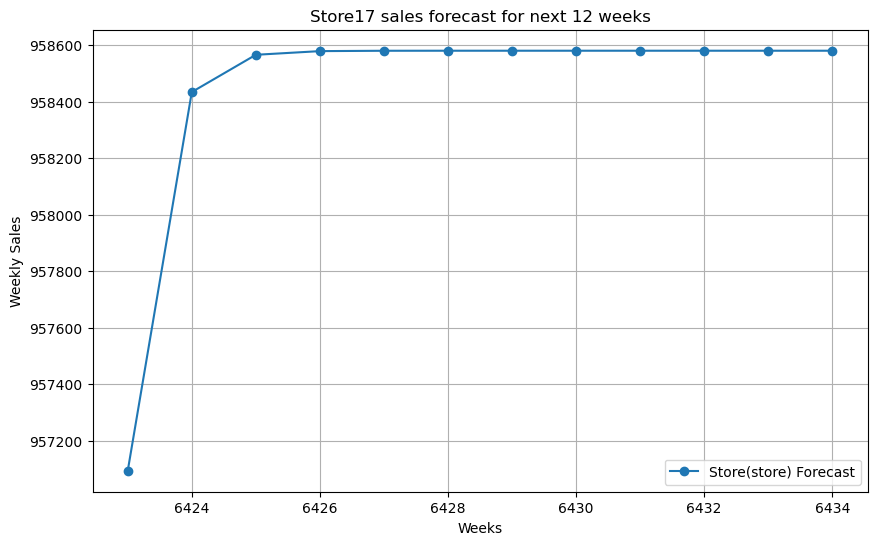

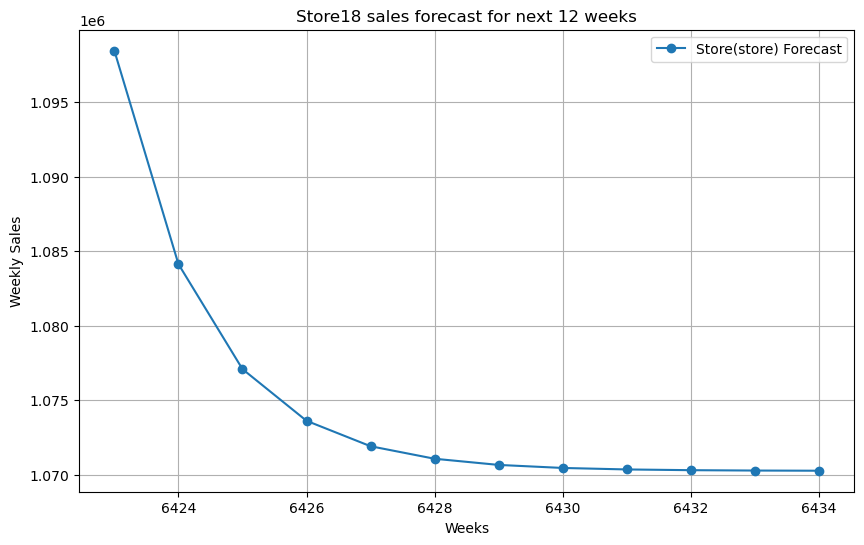

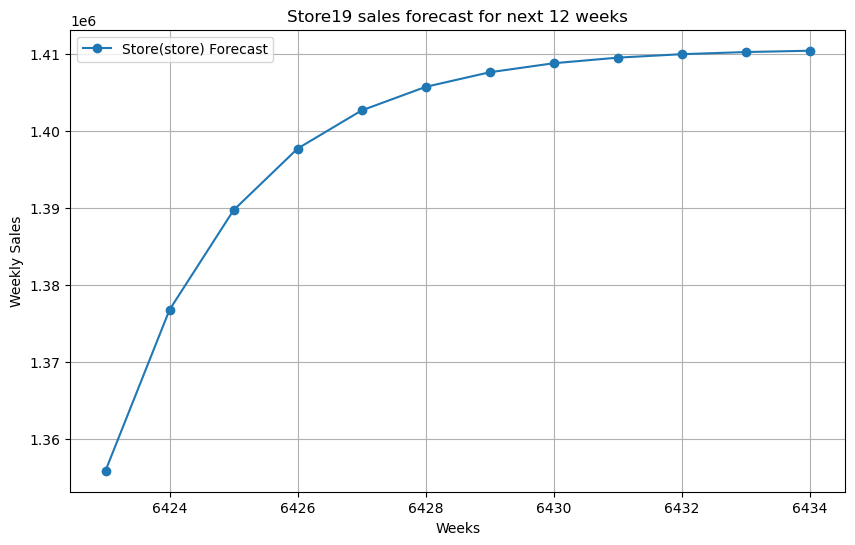

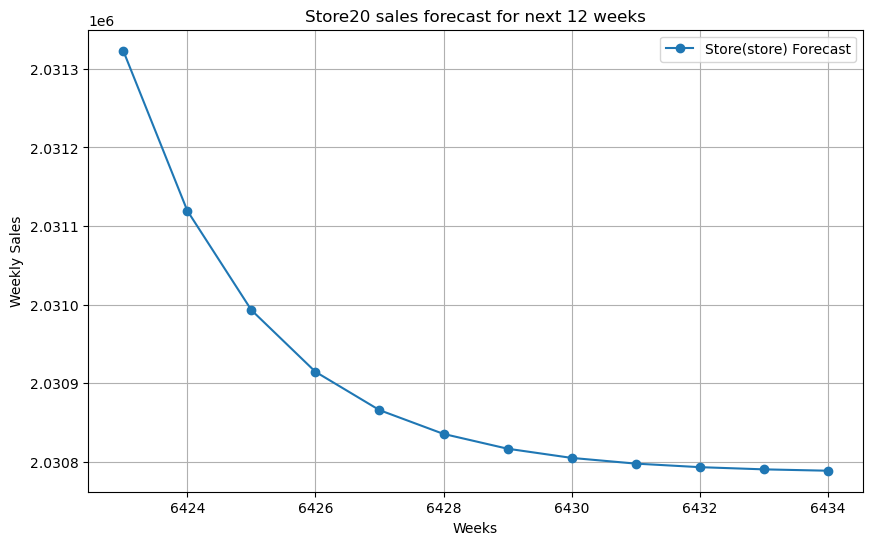

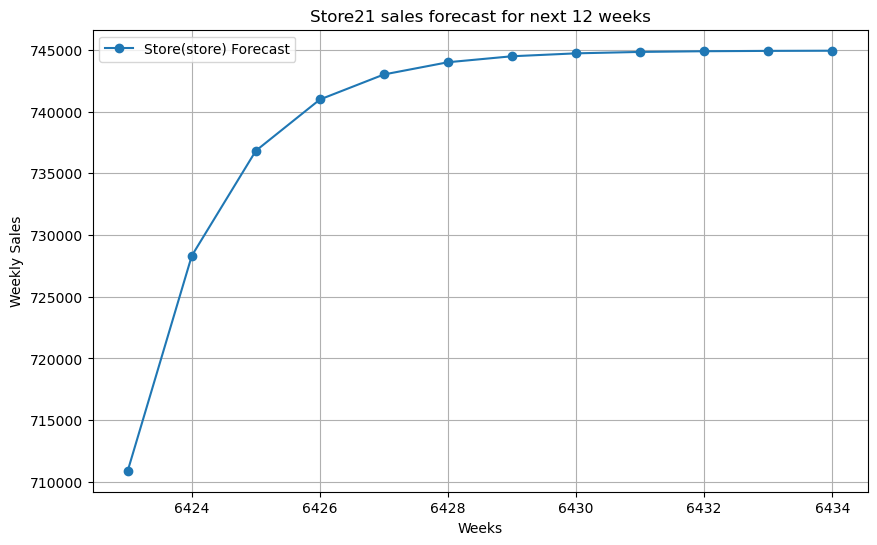

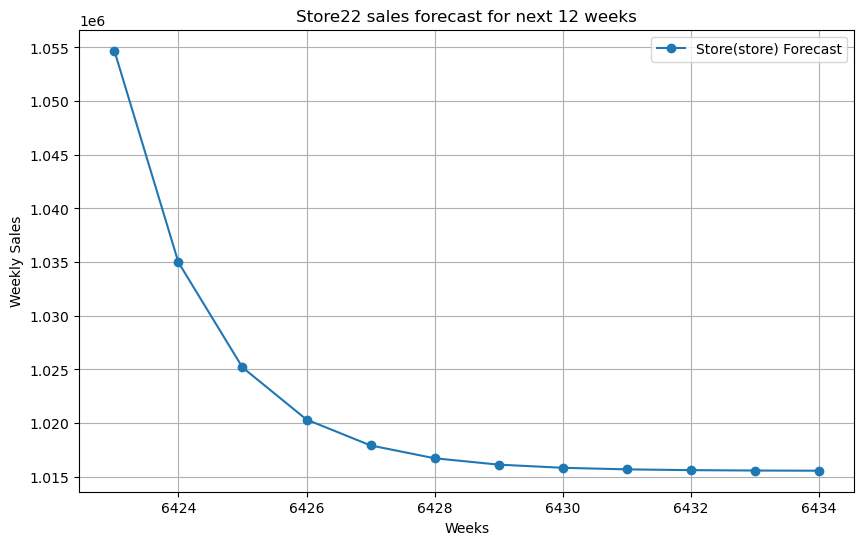

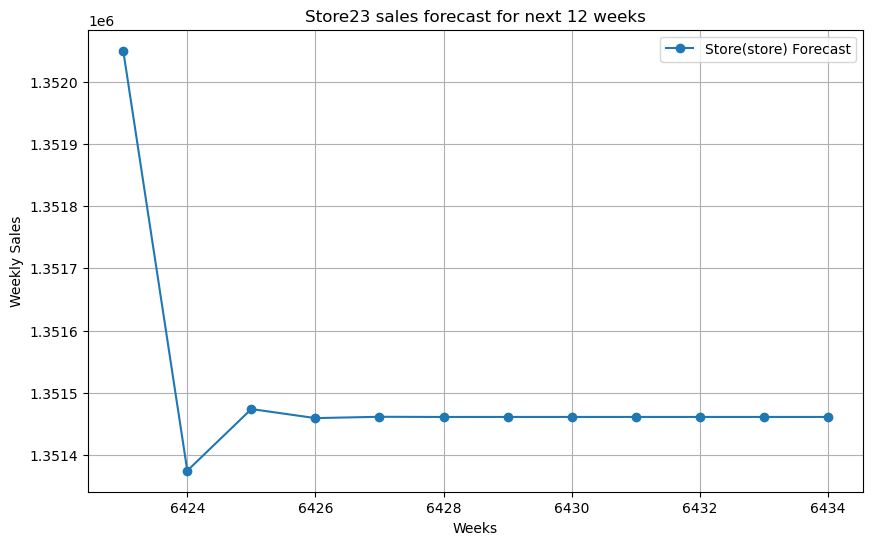

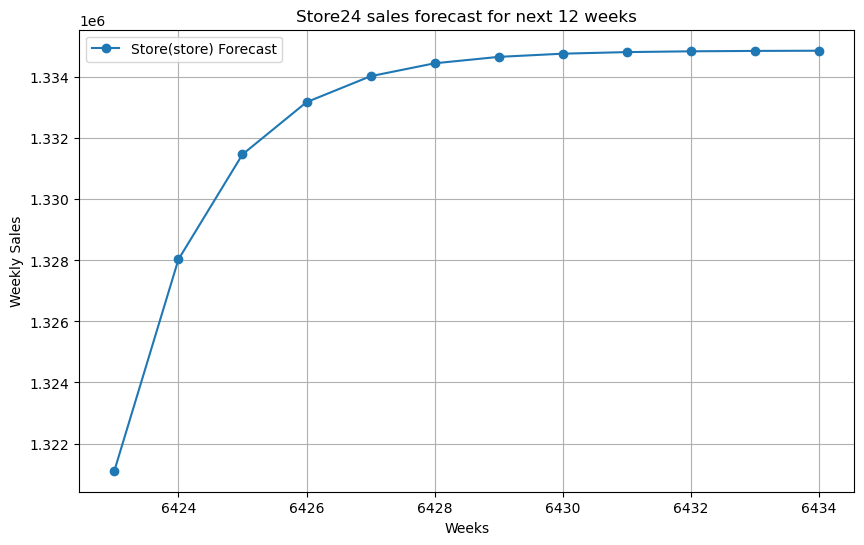

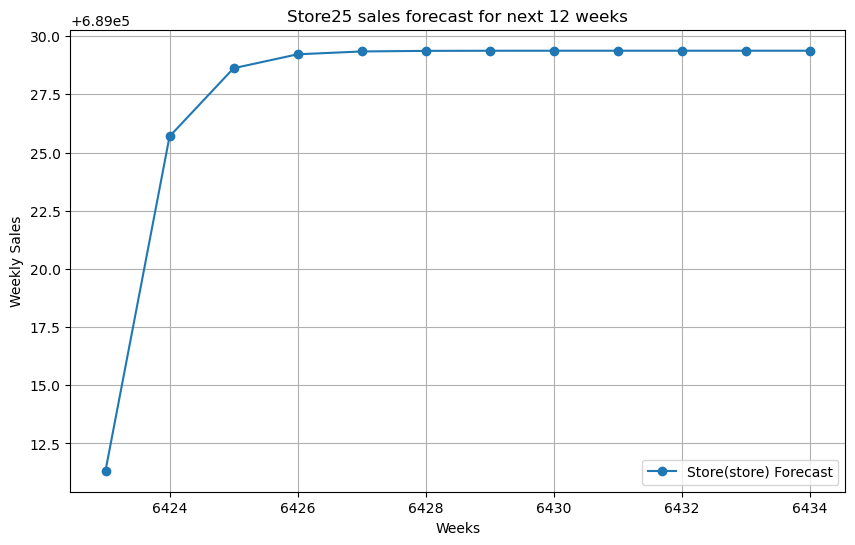

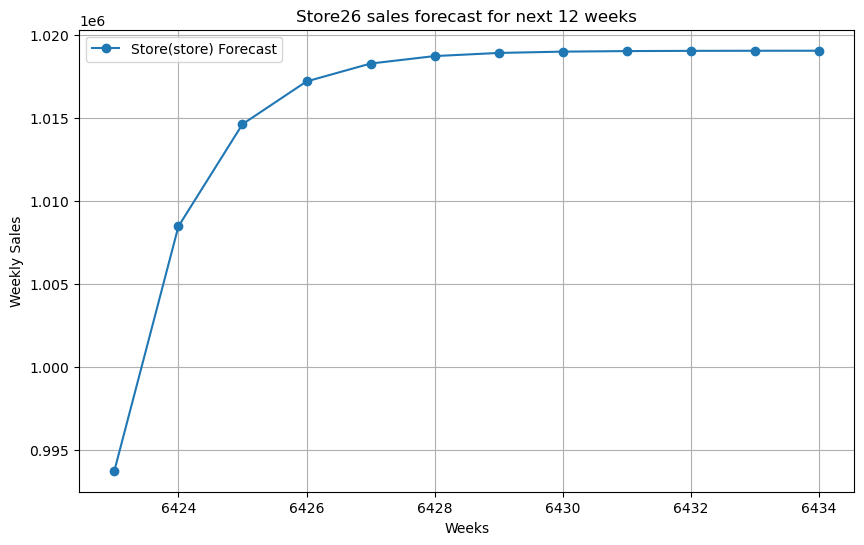

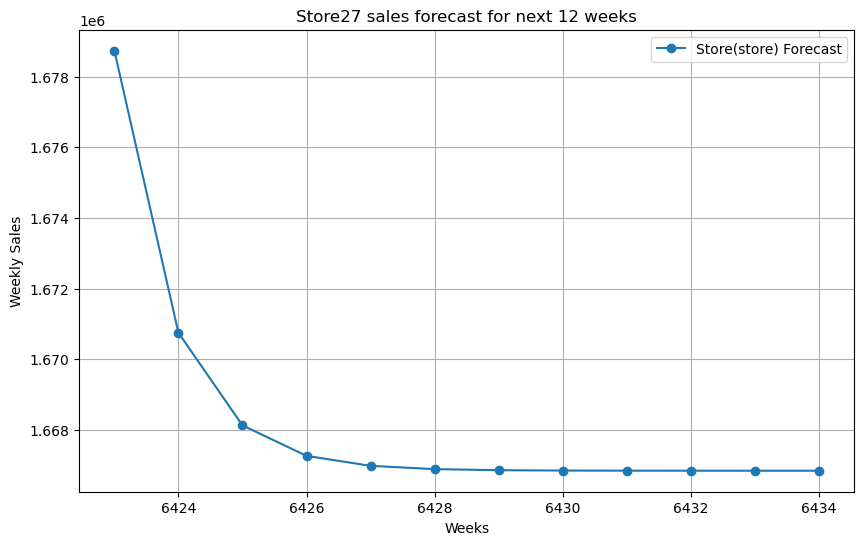

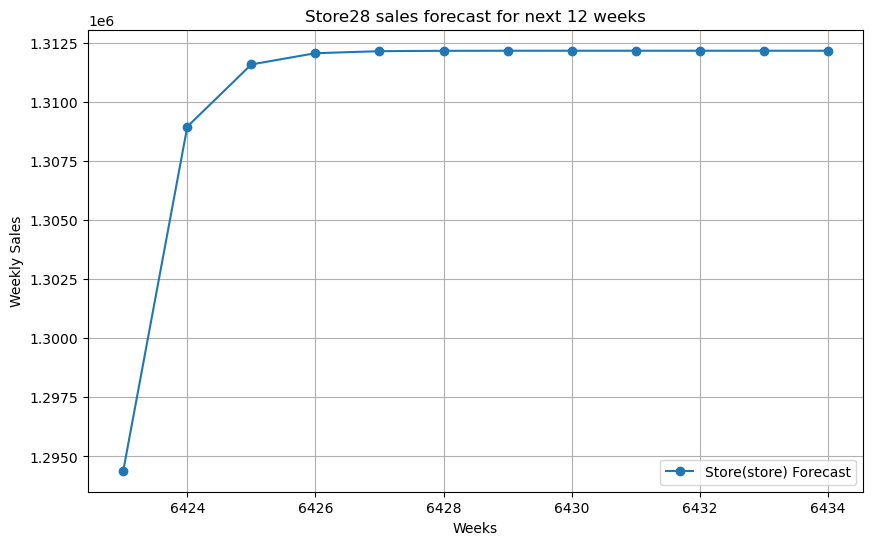

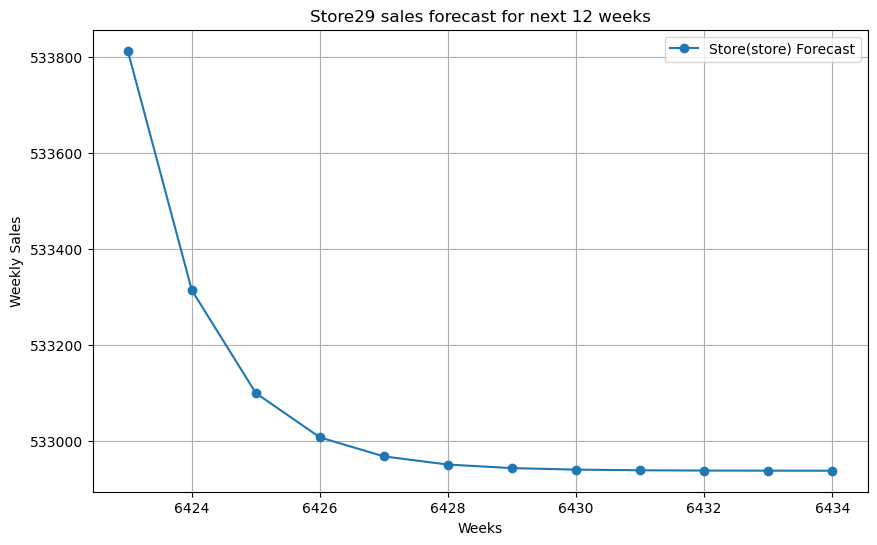

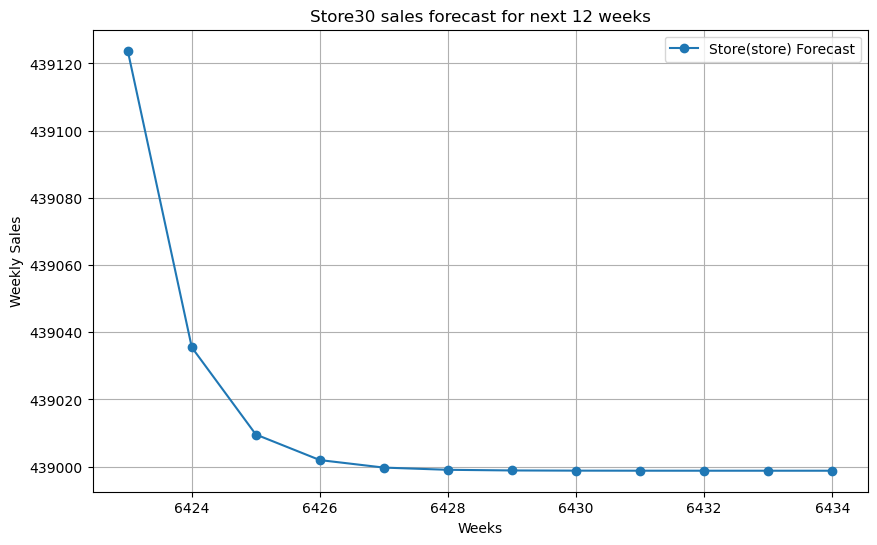

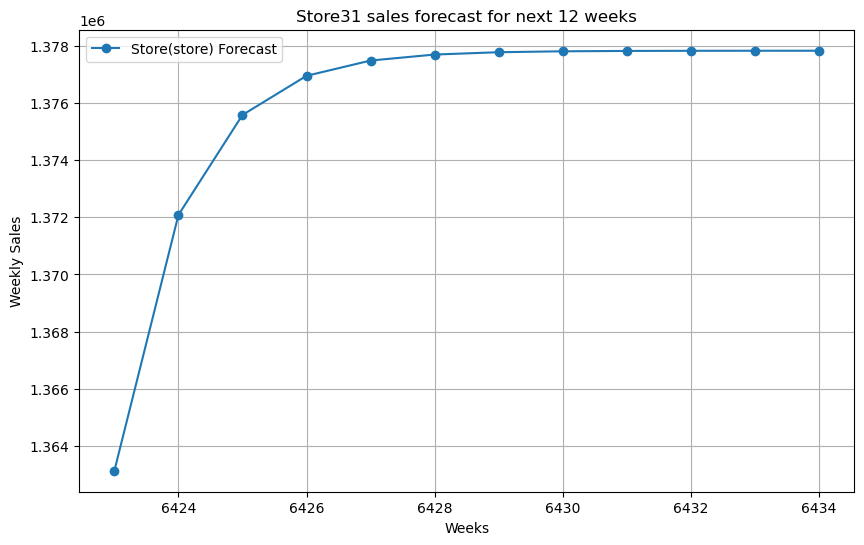

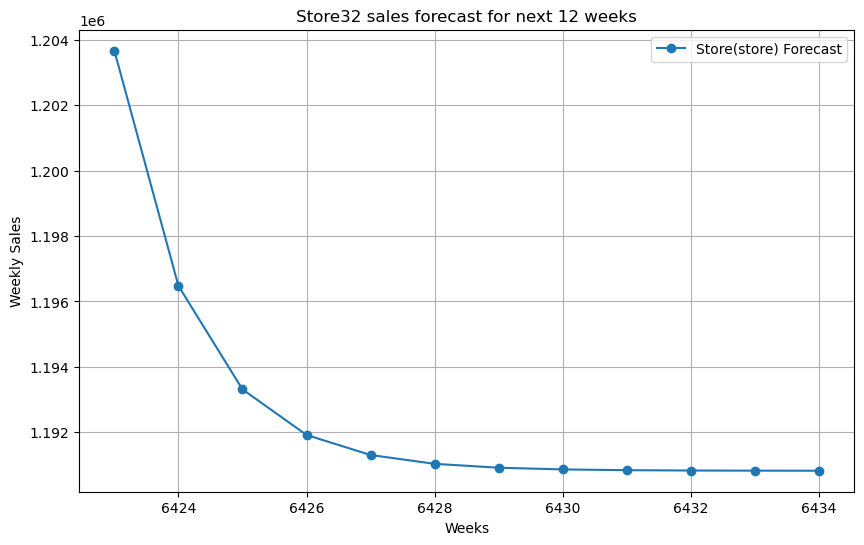

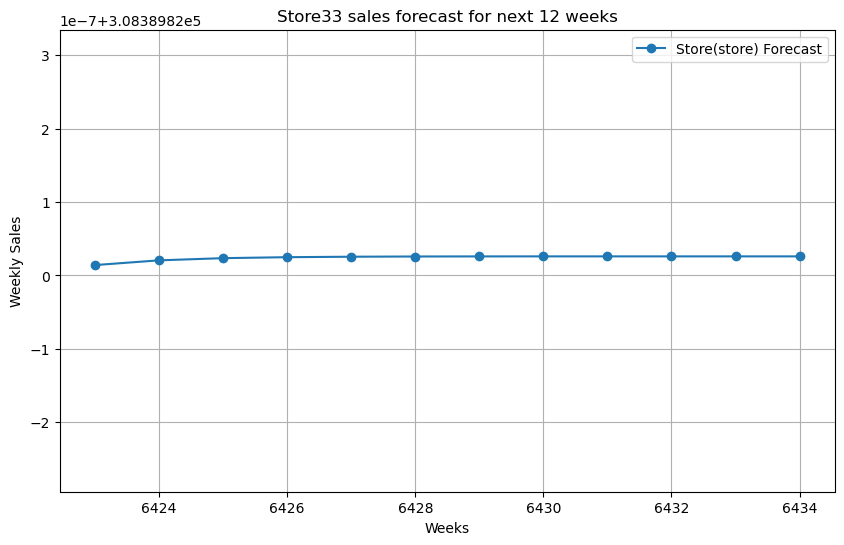

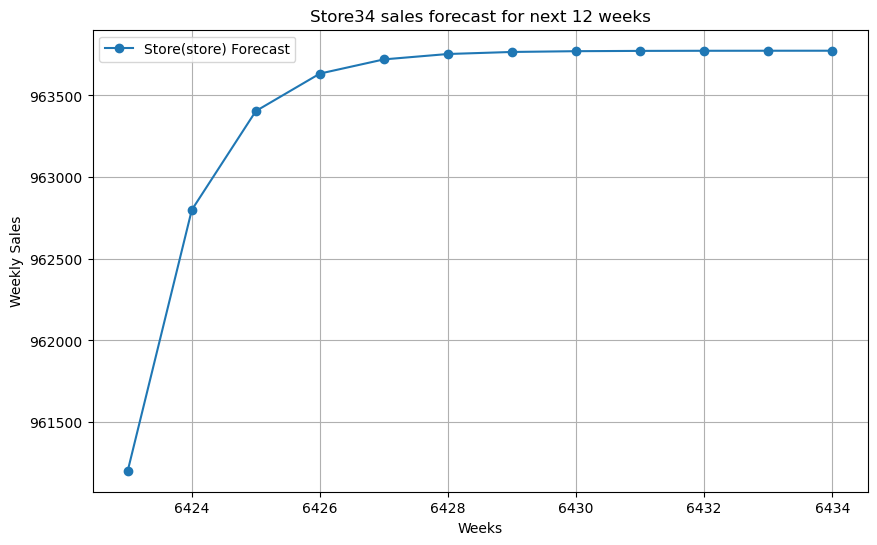

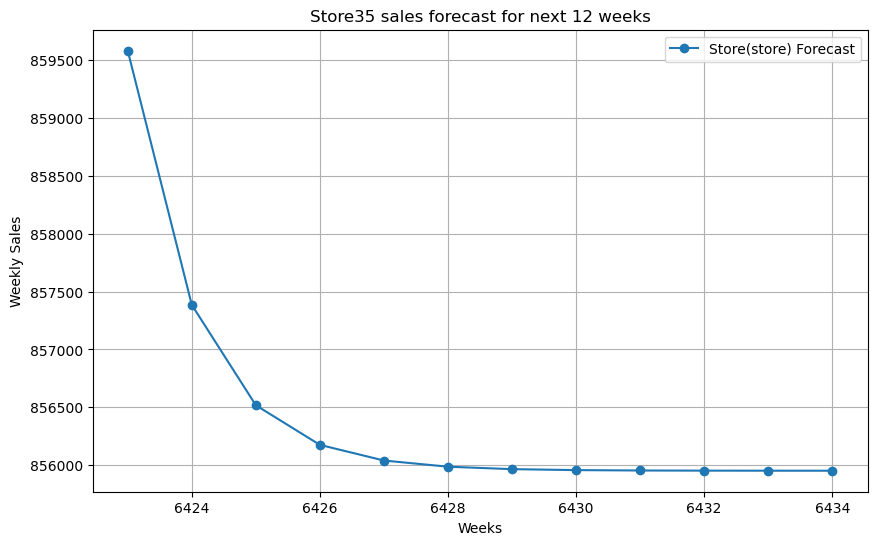

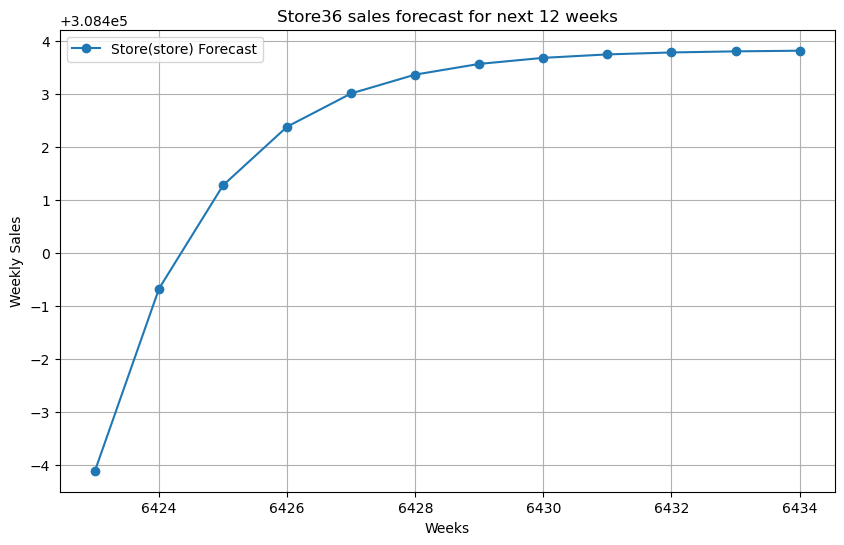

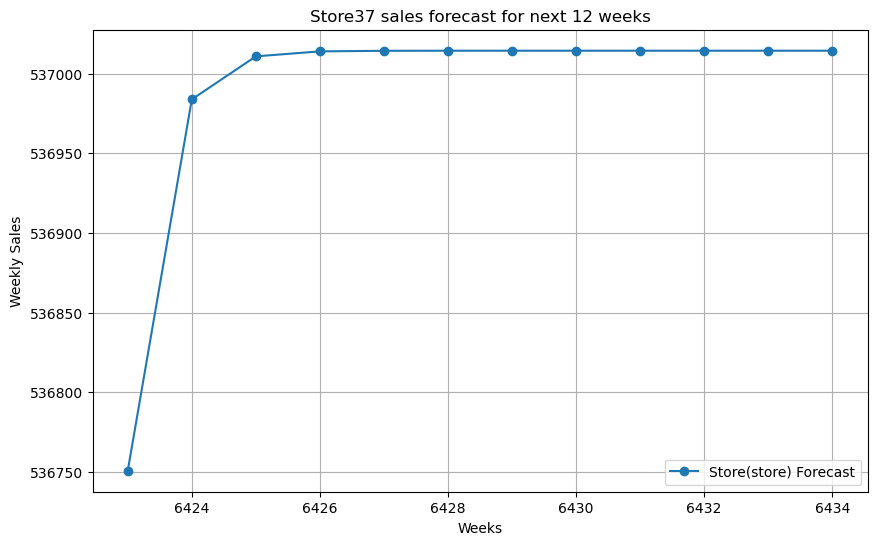

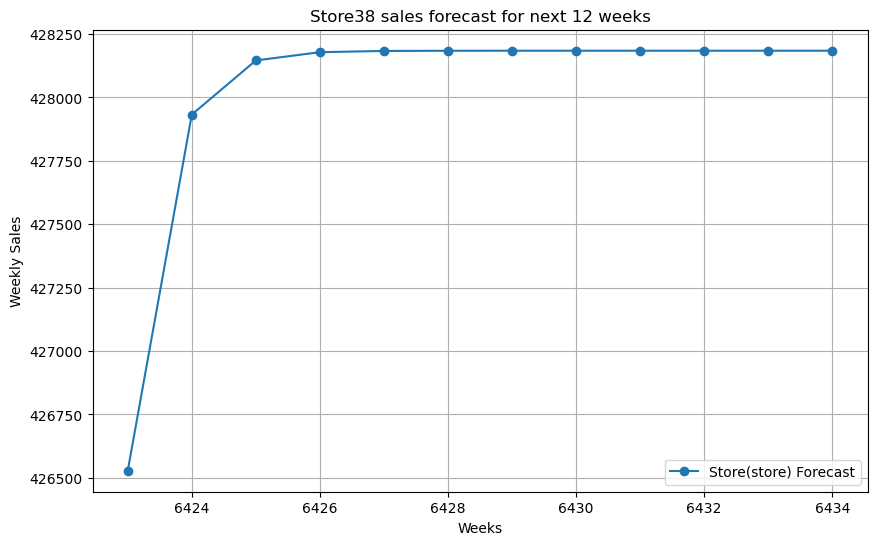

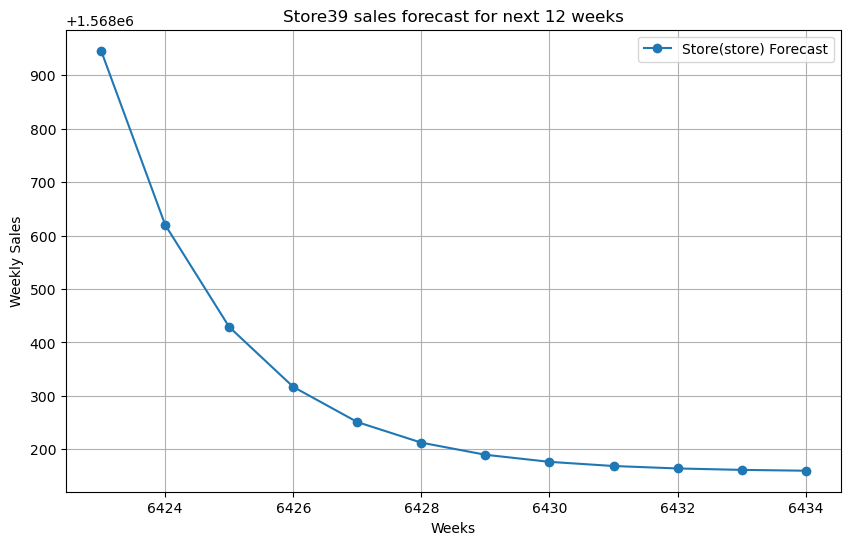

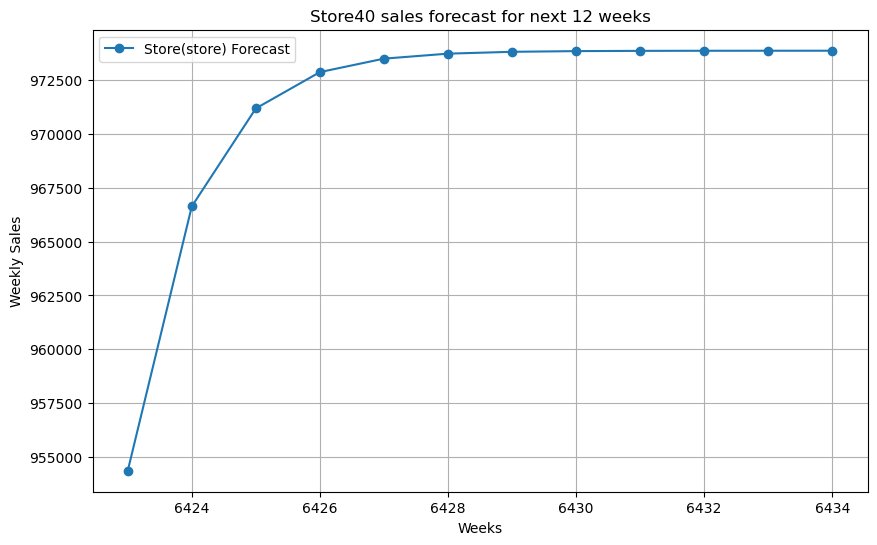

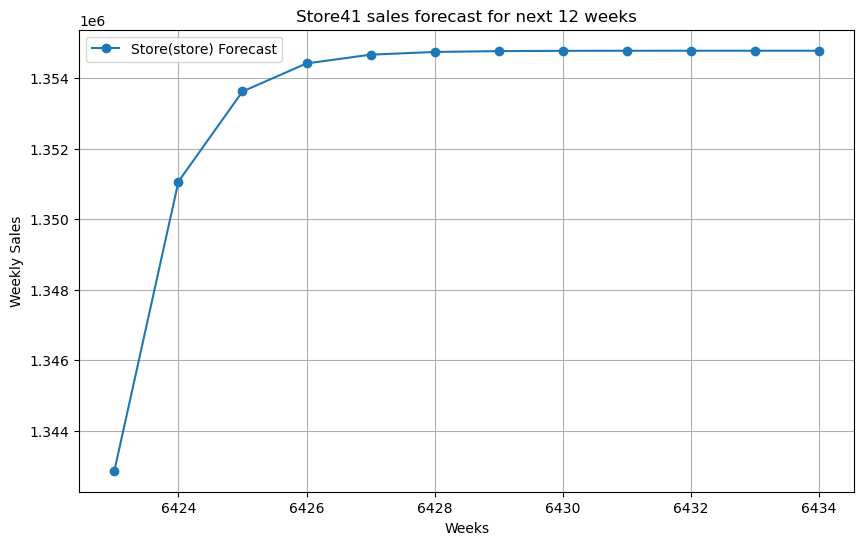

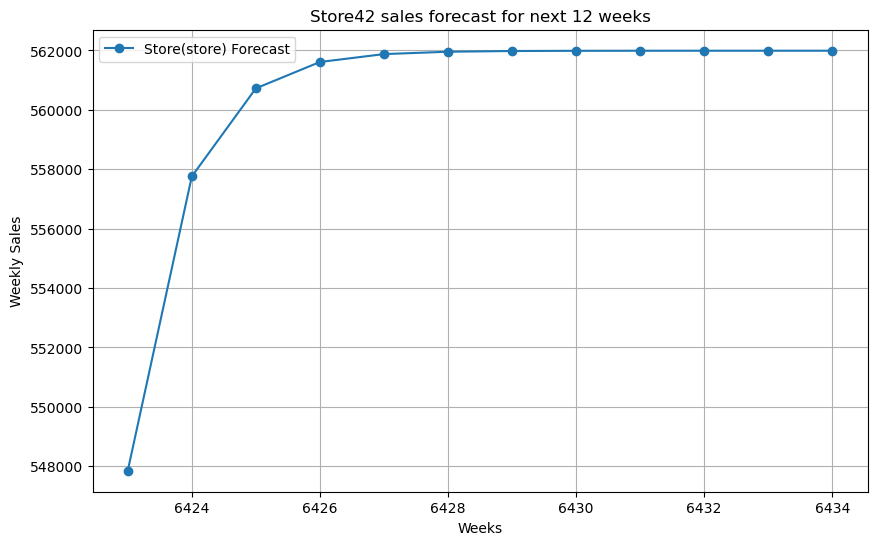

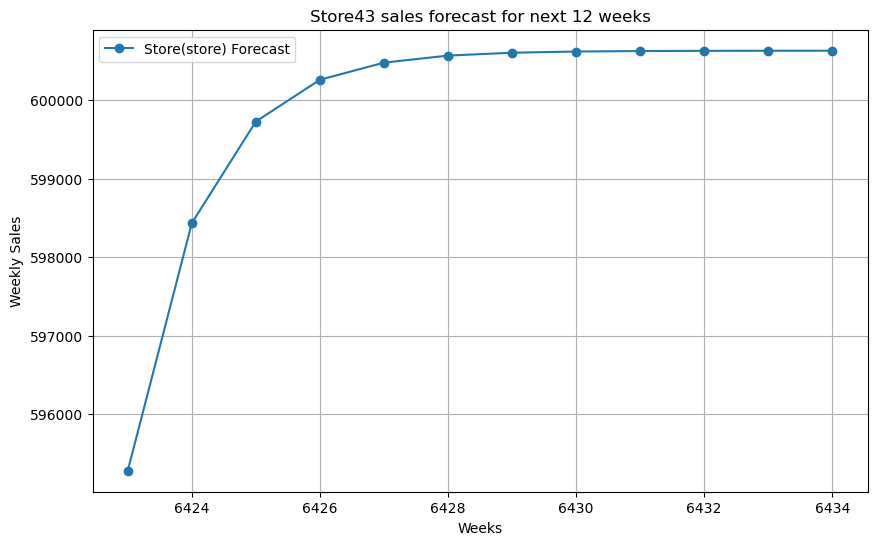

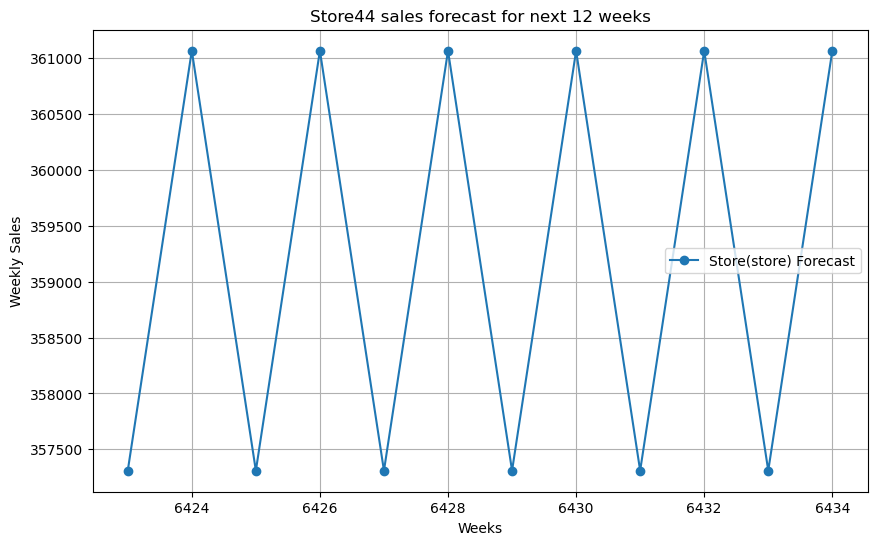

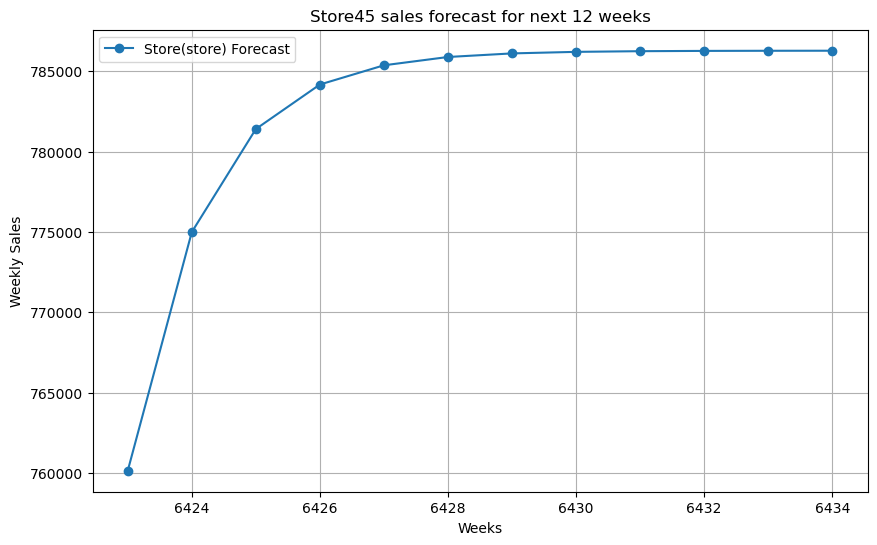

In [63]:
# Visualize the forecast

for store,forecast in forecast_results.items():
    plt.figure(figsize = (10,6))
    plt.plot(range(len(train_data), len(train_data) + len(forecast)), forecast, label = f'Store(store) Forecast', marker = 'o')
    plt.xlabel("Weeks")
    plt.ylabel("Weekly Sales")
    plt.title(f"Store{store} sales forecast for next 12 weeks")
    plt.legend()
    plt.grid(True)
    plt.show()